In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import hddm 
from patsy import dmatrix 
import numpy as np
from sys import platform
# print(hddm.__version__)

%matplotlib inline
# plt.rcParams['figure.figsize'] = 30, 10
sns.set_context("notebook", font_scale=10, rc={"lines.linewidth": 10, "lines.markersize": 30})

## Pre-processing

In [14]:
if platform == 'linux2':
    home = '/data/'
elif platform == 'darwin': 
    home = '/Users/67981492/'

In [15]:
!pwd
write_dir = home + 'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/'

/Users/67981492/Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/analysis_nbs


In [13]:
all_obs_data = hddm.load_csv(home+'loki_0/simple_rt_experiment_probabilityC/analysis/aggregated_data/combined_learning_sig_obs_data.csv')

In [14]:
all_obs_data.head(10)

ID experiment condition  trial  shifted_epoch_trial  cp_with_slow_fast  \
0  761   conflict        hc      0                    0                1.0   
1  761   conflict        hc      1                    1                0.0   
2  761   conflict        hc      2                    2                0.0   
3  761   conflict        hc      3                    3                0.0   
4  761   conflict        hc      4                    4                0.0   
5  761   conflict        hc      5                    5                0.0   
6  761   conflict        hc      6                    6                0.0   
7  761   conflict        hc      7                    7                0.0   
8  761   conflict        hc      8                    8                0.0   
9  761   conflict        hc      9                    9                0.0   

   obs_cp_with_slow_fast  p_id_accuracy        rt  lr_choice  ...  \
0                    0.0              1  0.711570        1.0  ...   
1                    1.0              0  0.681410        1.0  ...   
2                    0.0              1  0.767118        0.0  ...   
3                    0.0              0  0.507209        1.0  ...   
4                    0.0              1  0.656259        1.0  ...   
5                    1.0              1  0.342321        0.0  ...   
6                    1.0              1  0.426794        0.0  ...   
7                    1.0              1  0.405805        1.0  ...   
8                    0.0              1  0.317552        0.0  ...   
9                    0.0              0  0.329534        0.0  ...   

   cumulative_reward       iti  total_trial_time  epoch_n  epoch_trial  \
0              599.0  0.670199          2.385458      1.0            0   
1              598.0  0.259707          1.939019      1.0            1   
2              599.0  0.740615          2.498060      1.0            2   
3              598.0  0.250242          1.742433      1.0            3   
4              599.0  0.700190          2.350417      1.0            4   
5              598.0  0.498231          1.831150      1.0            5   
6              600.0  0.670761          2.089318      1.0            6   
7              599.0  0.536222          1.931960      1.0            7   
8              598.0  0.491285          1.804999      1.0            8   
9              601.0  0.325074          1.650262      1.0            9   

   n_epoch_trials  prop_112       cpp   ideal_B  target_B  
0              36  0.305556  0.099471  0.000000  0.000000  
1              36  0.305556  0.035079 -1.241007  0.000000  
2              36  0.305556  0.023075 -0.595781 -1.241007  
3              36  0.305556  0.019881 -0.306135 -0.595781  
4              36  0.305556  0.018539 -0.139394 -0.306135  
5              36  0.305556  0.268538 -0.027685 -0.139394  
6              36  0.305556  0.035630 -0.804363 -0.027685  
7              36  0.305556  0.785155  0.064818 -0.804363  
8              36  0.305556  0.352873 -2.800194  0.064818  
9              36  0.305556  0.206726  0.557813 -2.800194  

[10 rows x 28 columns]

In [15]:
all_obs_data.columns = all_obs_data.columns.str.strip()
all_obs_data.head()

ID experiment condition  trial  shifted_epoch_trial  cp_with_slow_fast  \
0  761   conflict        hc      0                    0                1.0   
1  761   conflict        hc      1                    1                0.0   
2  761   conflict        hc      2                    2                0.0   
3  761   conflict        hc      3                    3                0.0   
4  761   conflict        hc      4                    4                0.0   

   obs_cp_with_slow_fast  p_id_accuracy        rt  lr_choice  ...  \
0                    0.0              1  0.711570        1.0  ...   
1                    1.0              0  0.681410        1.0  ...   
2                    0.0              1  0.767118        0.0  ...   
3                    0.0              0  0.507209        1.0  ...   
4                    0.0              1  0.656259        1.0  ...   

   cumulative_reward       iti  total_trial_time  epoch_n  epoch_trial  \
0              599.0  0.670199          2.385458      1.0            0   
1              598.0  0.259707          1.939019      1.0            1   
2              599.0  0.740615          2.498060      1.0            2   
3              598.0  0.250242          1.742433      1.0            3   
4              599.0  0.700190          2.350417      1.0            4   

   n_epoch_trials  prop_112       cpp   ideal_B  target_B  
0              36  0.305556  0.099471  0.000000  0.000000  
1              36  0.305556  0.035079 -1.241007  0.000000  
2              36  0.305556  0.023075 -0.595781 -1.241007  
3              36  0.305556  0.019881 -0.306135 -0.595781  
4              36  0.305556  0.018539 -0.139394 -0.306135  

[5 rows x 28 columns]

In [16]:
all_obs_data.columns

Index([u'ID', u'experiment', u'condition', u'trial', u'shifted_epoch_trial',
       u'cp_with_slow_fast', u'obs_cp_with_slow_fast', u'p_id_accuracy', u'rt',
       u'lr_choice', u'lr_solution', u'cue_choice', u'high_p_cue',
       u'low_p_cue', u'high_val_cue', u'low_val_cue', u'obs_accuracy',
       u'reward', u'cumulative_reward', u'iti', u'total_trial_time',
       u'epoch_n', u'epoch_trial', u'n_epoch_trials', u'prop_112', u'cpp',
       u'ideal_B', u'target_B'],
      dtype='object')

Text(0,0.5,'cumulative_reward')

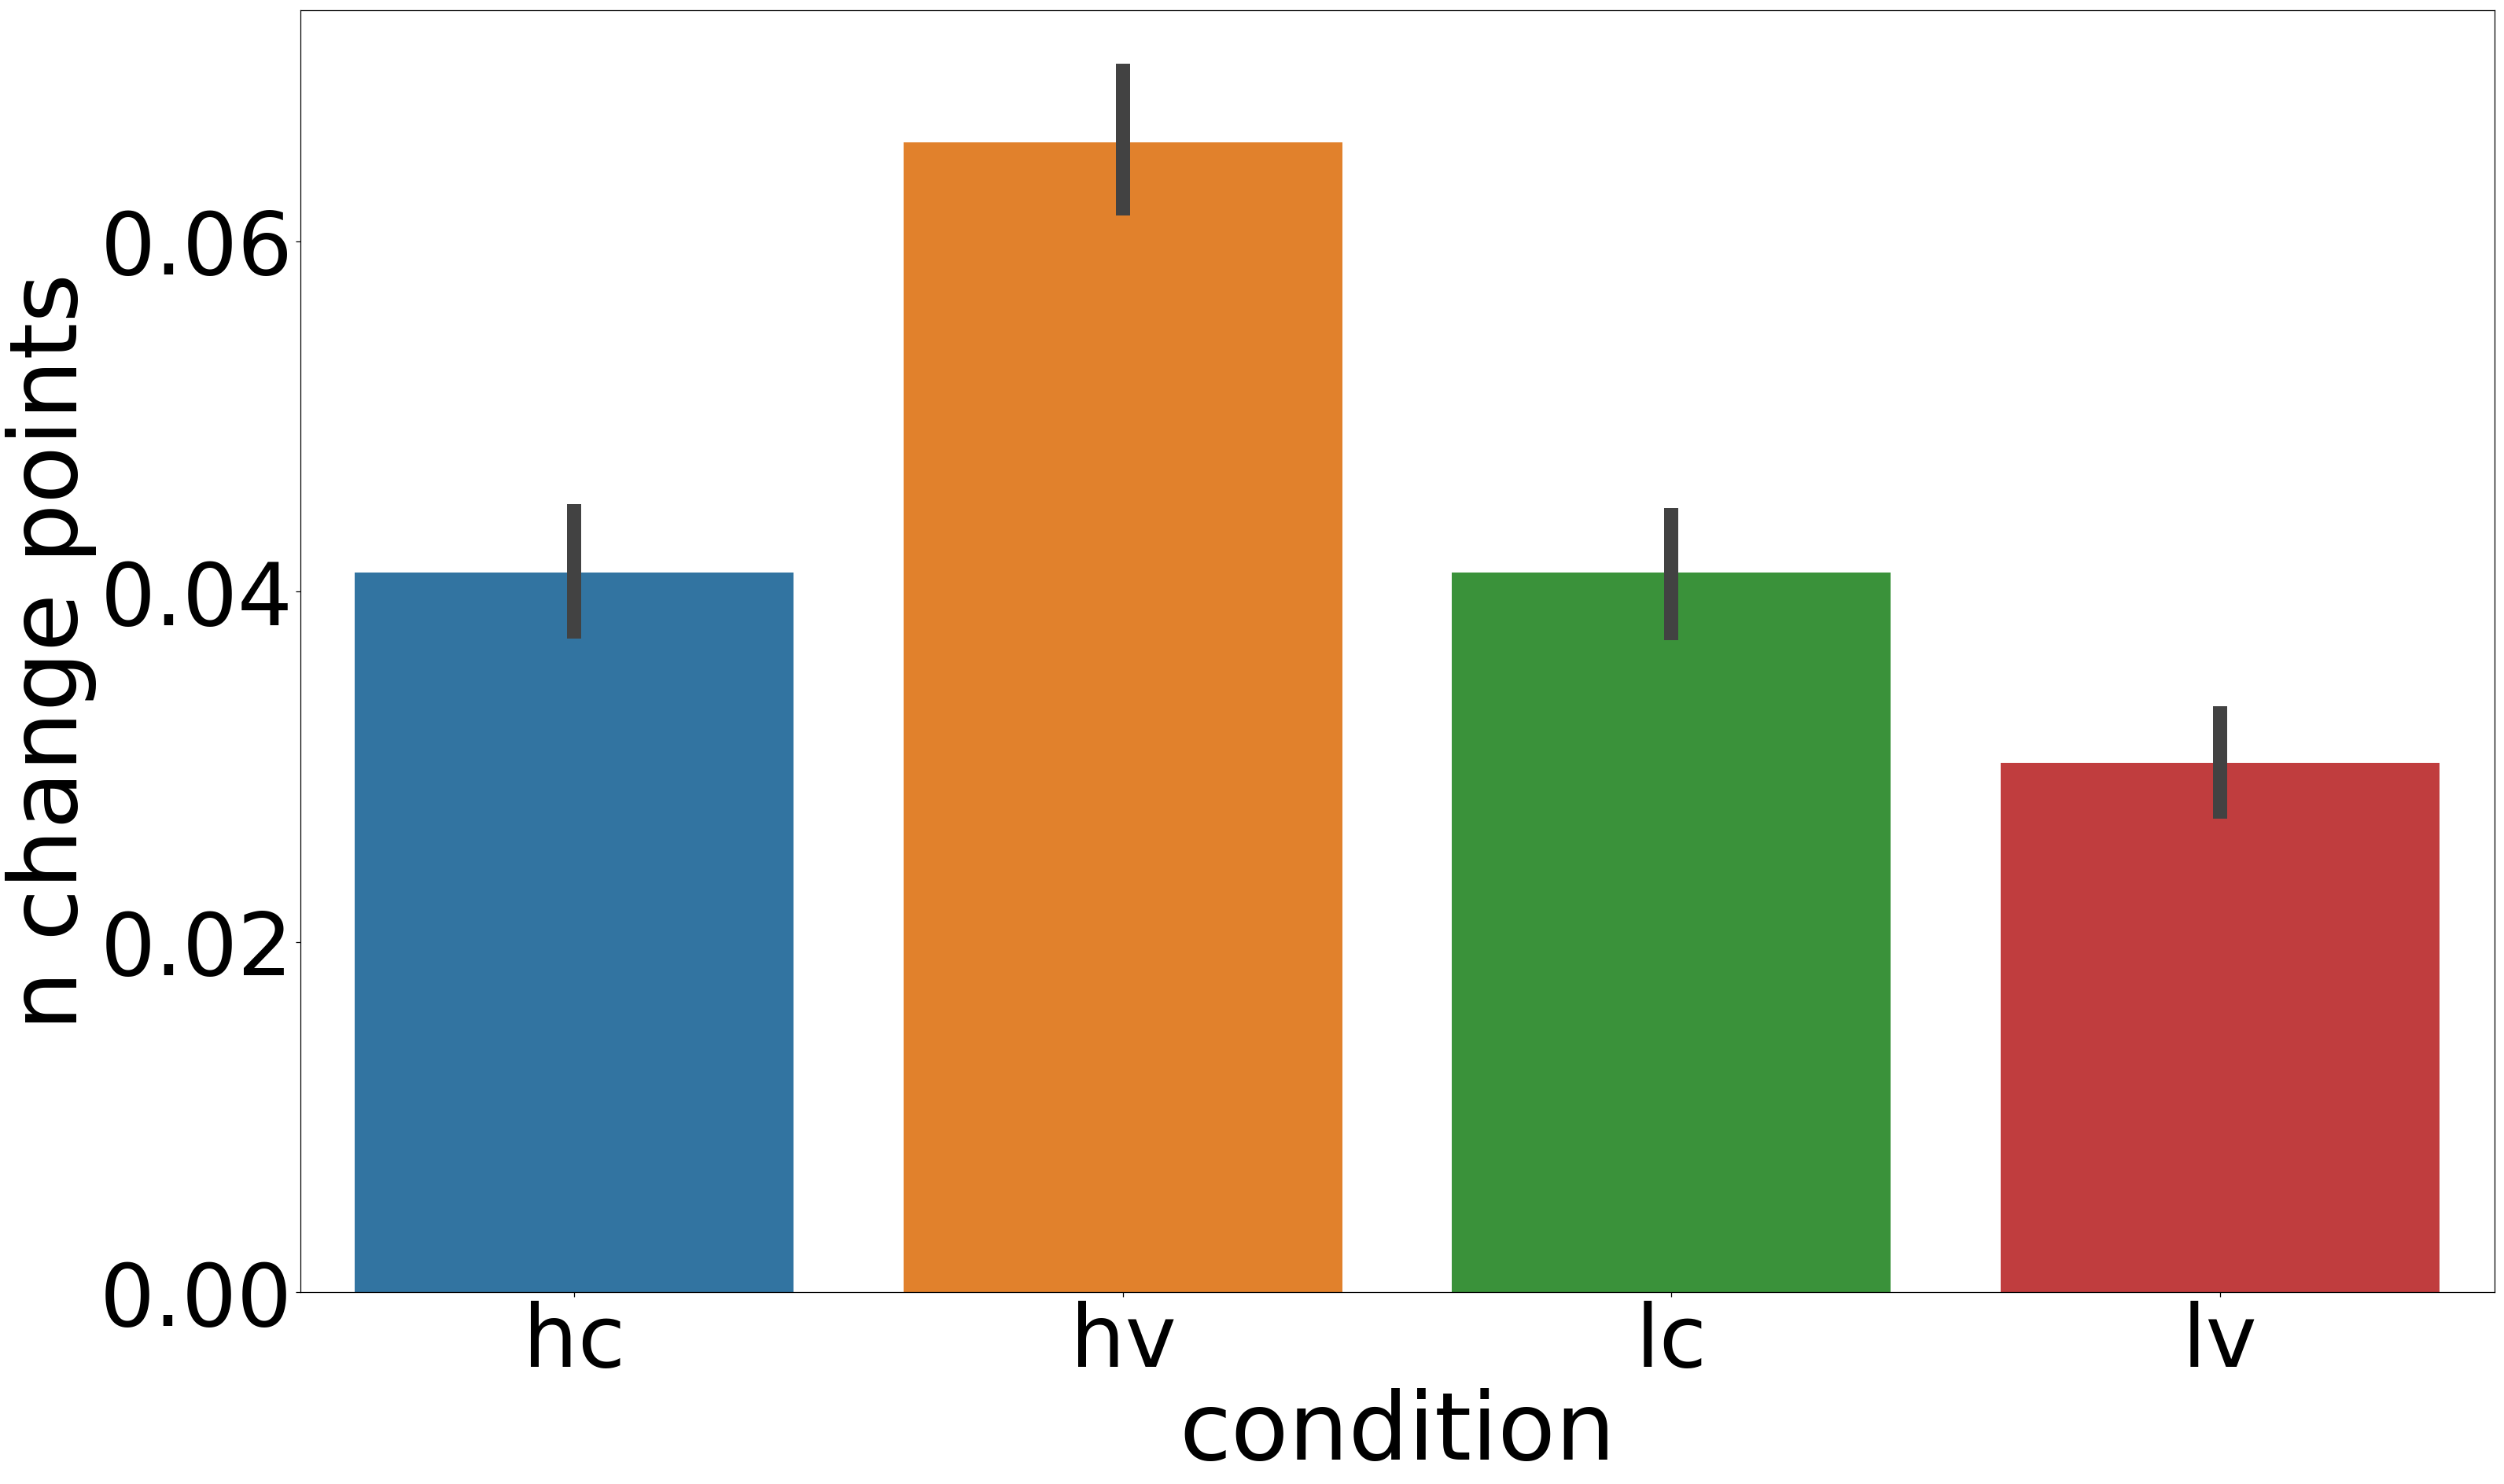

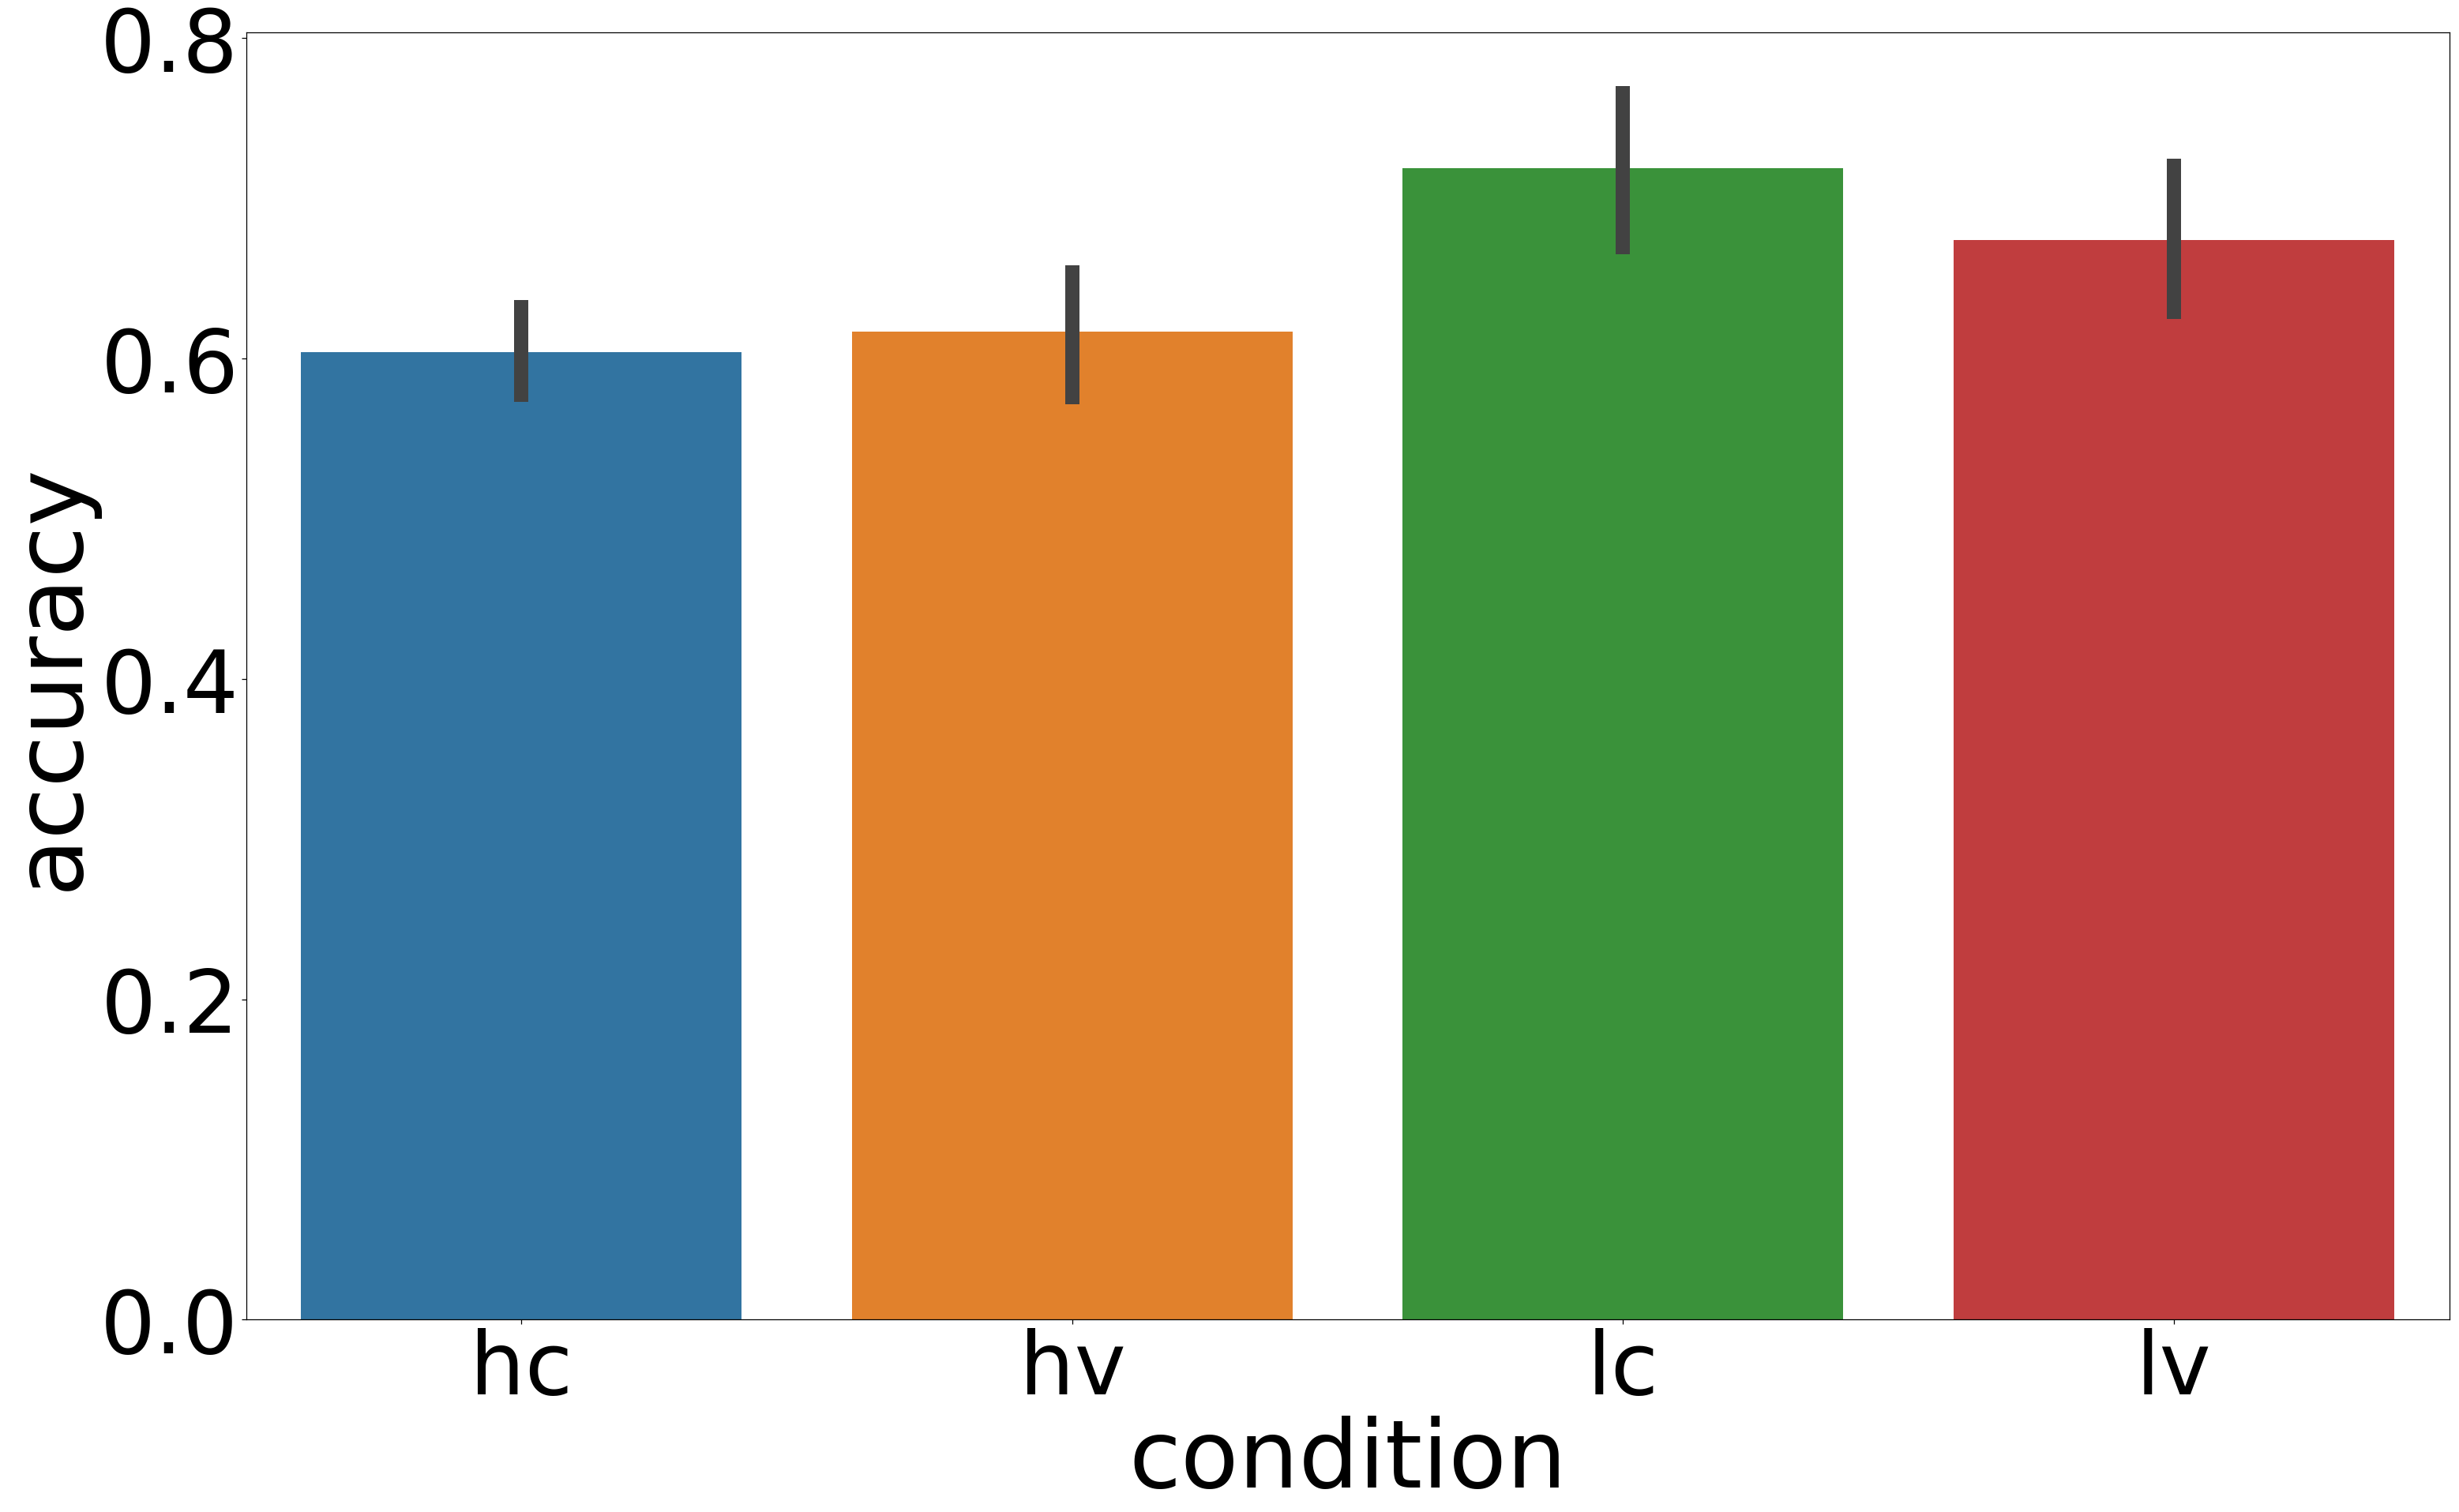

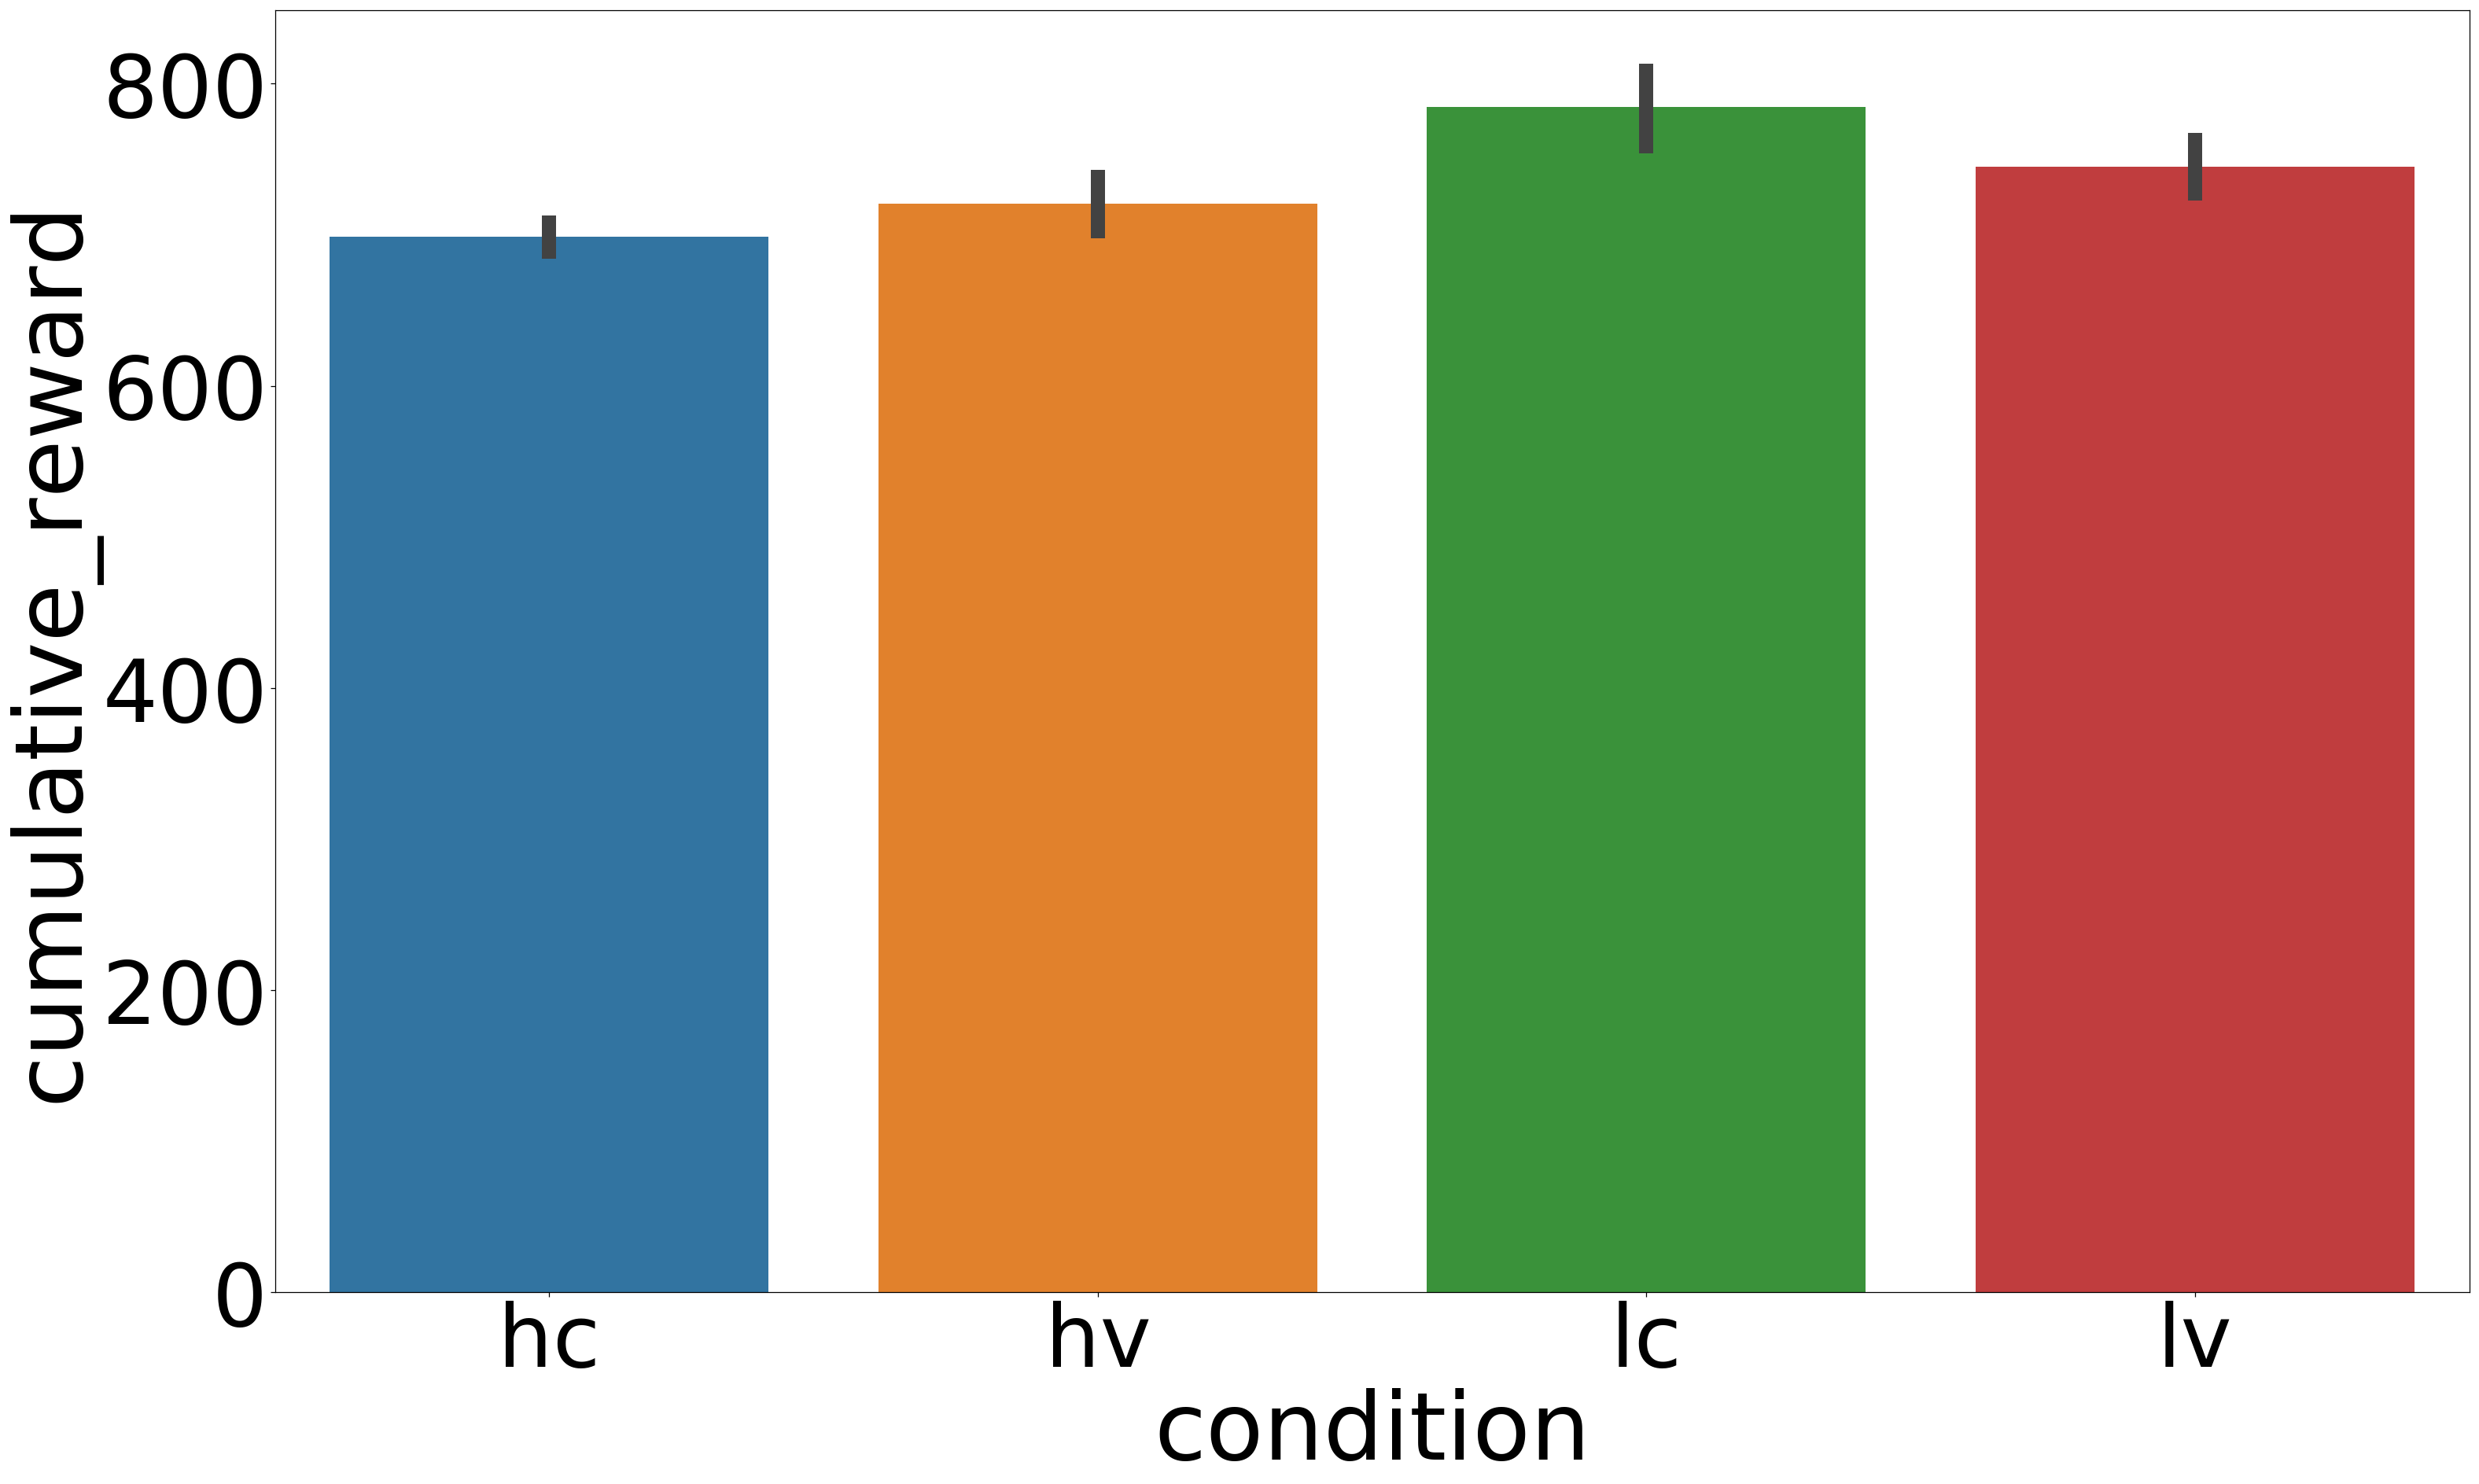

In [17]:
plt.figure(figsize=(50,30))
sns.barplot(x="condition",y="cp_with_slow_fast", data=all_obs_data, ci=95, n_boot=1000, units="ID" )
plt.ylabel('n change points')

plt.figure(figsize=(50,30))
sns.barplot(x="condition",y="p_id_accuracy", data=all_obs_data, ci=95, n_boot=1000, units="ID")
plt.ylabel('accuracy')

plt.figure(figsize=(50,30))
sns.barplot(x="condition",y="cumulative_reward", data=all_obs_data, ci=95, n_boot=1000,units="ID")
plt.ylabel('cumulative_reward')

Text(0,0.5,'$\\Delta B$')

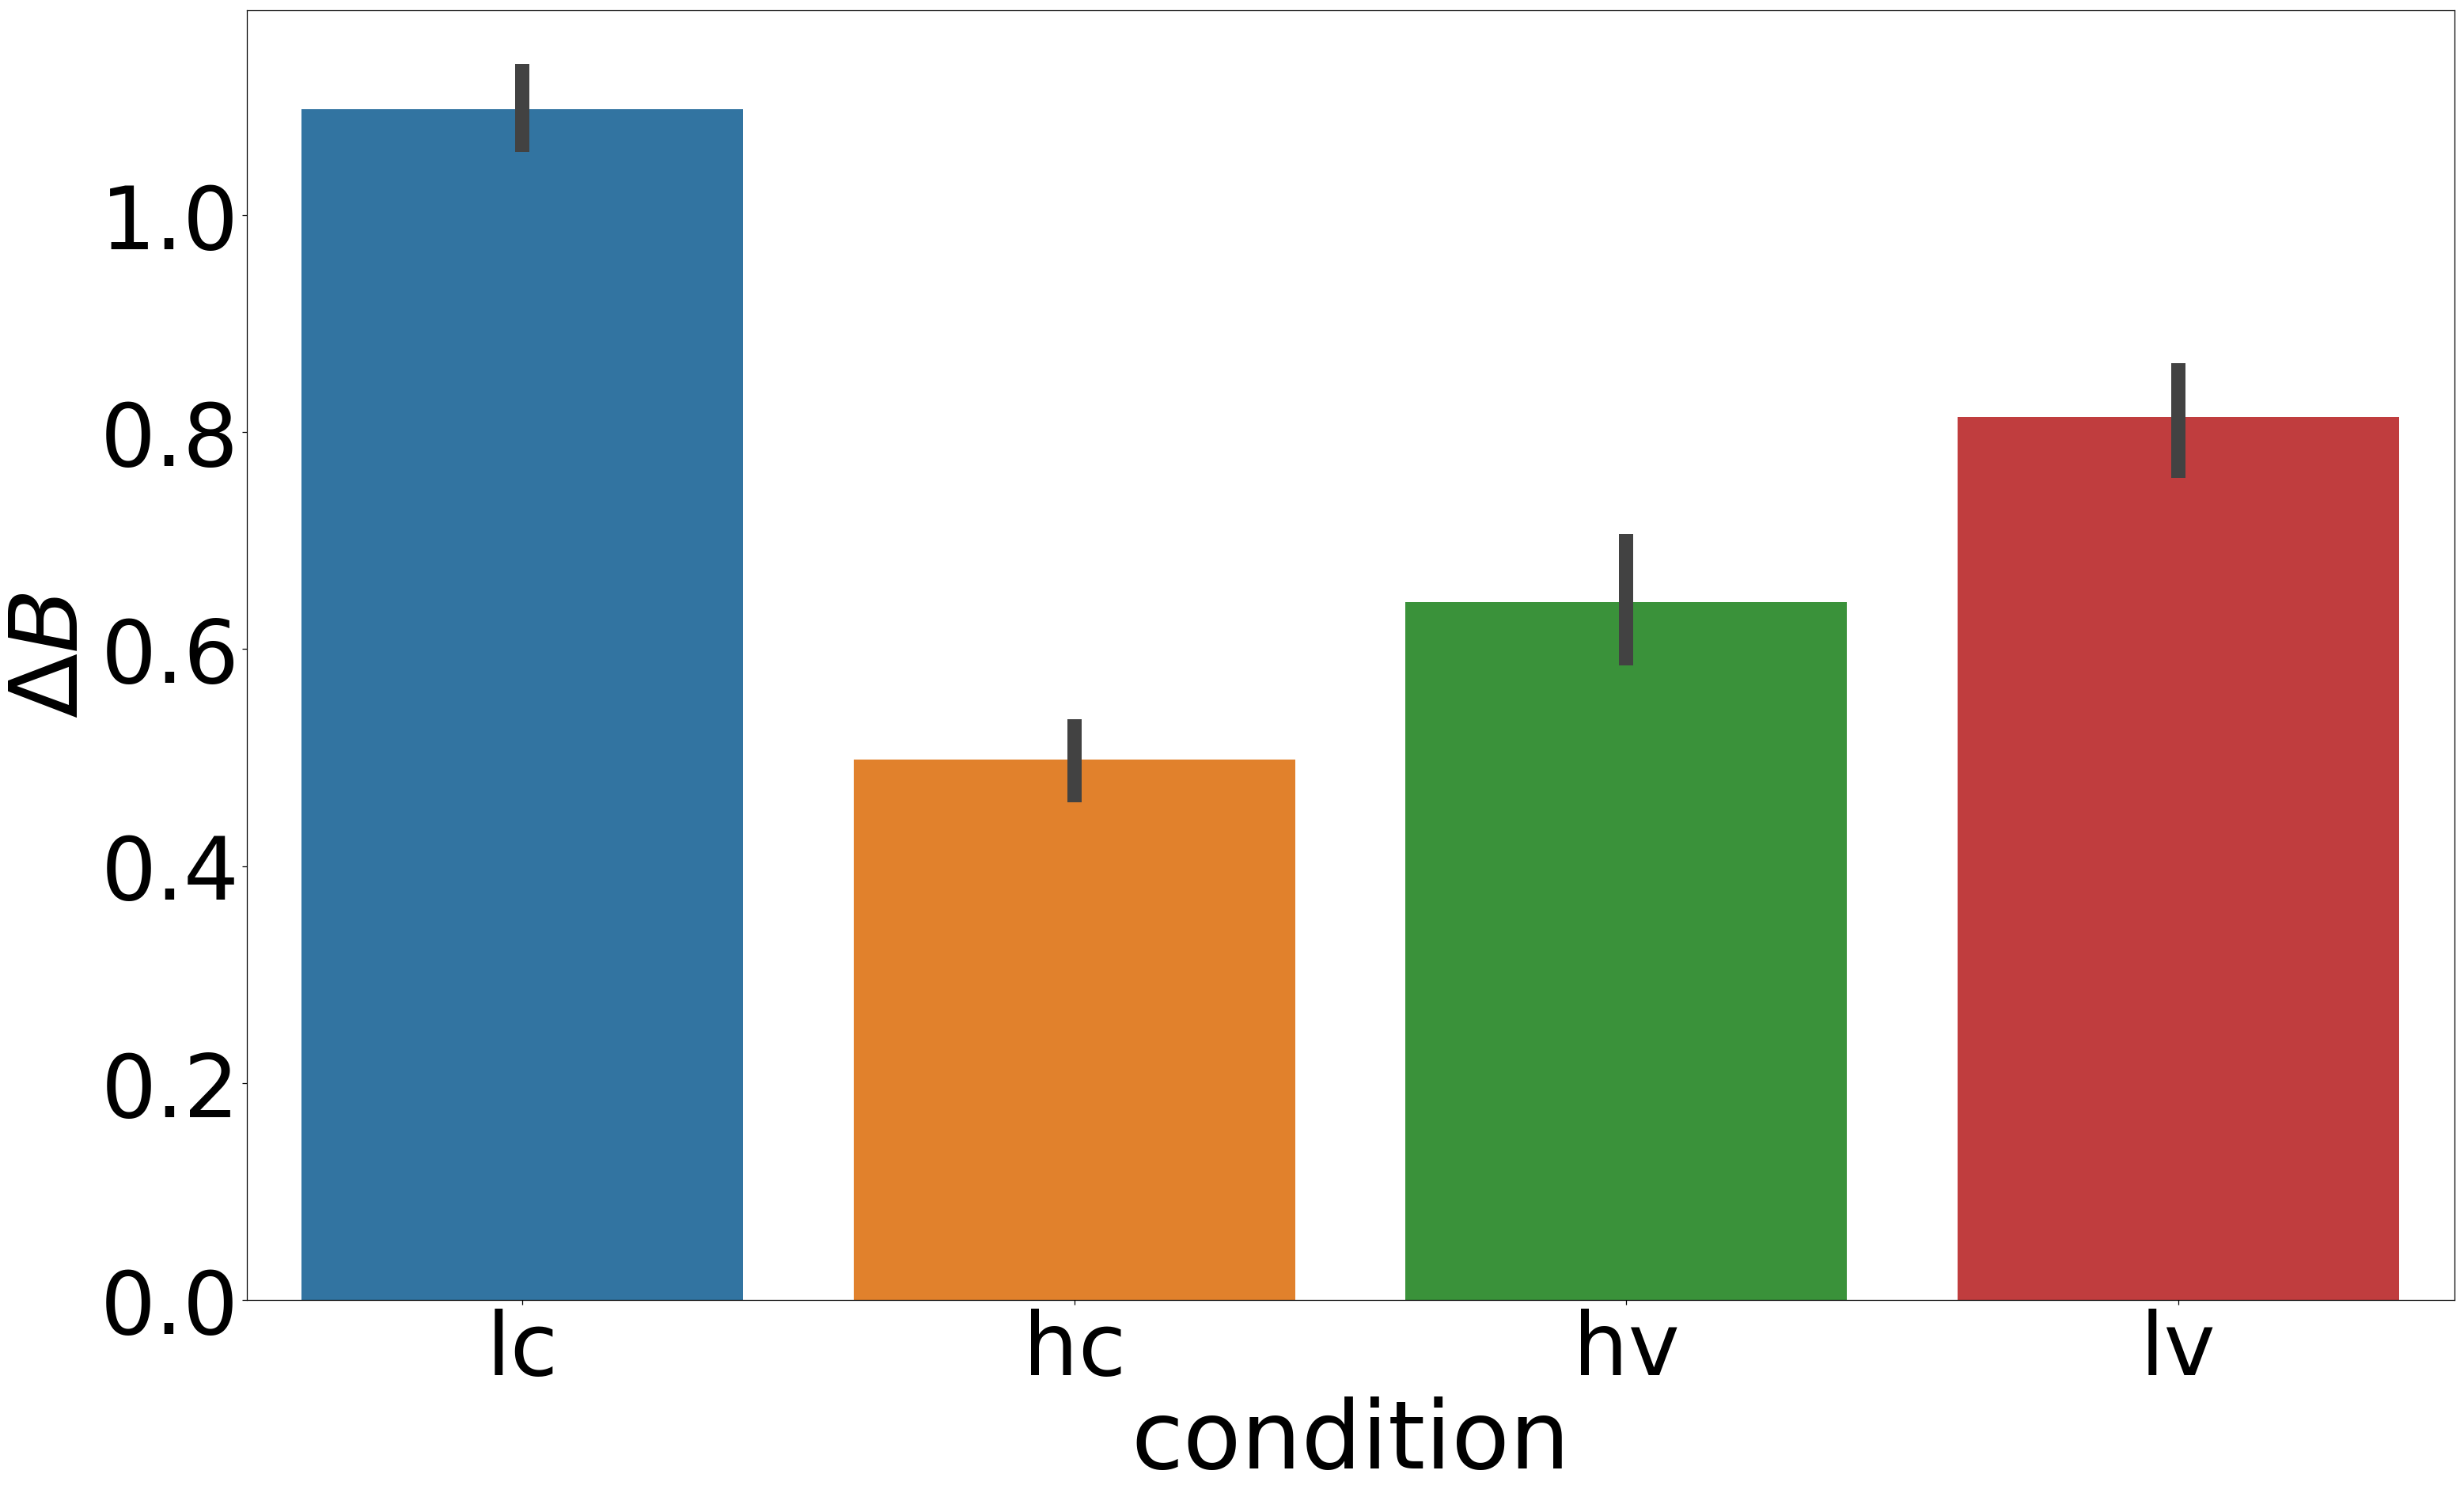

In [18]:
plt.figure(figsize=(50,30))
sns.barplot(x="condition",y="ideal_B", data=all_obs_data, 
            ci=95, n_boot=1000,units="ID",order=["lc", "hc", "hv", "lv"])
plt.ylabel('$\Delta B$')

In [19]:
all_obs_data.loc[(all_obs_data.condition == 'hc') |( all_obs_data.condition == 'lc'), 'experiment'] = 'conflict'
all_obs_data.loc[(all_obs_data.condition == 'hv') |( all_obs_data.condition == 'lv'), 'experiment'] = 'volatility'

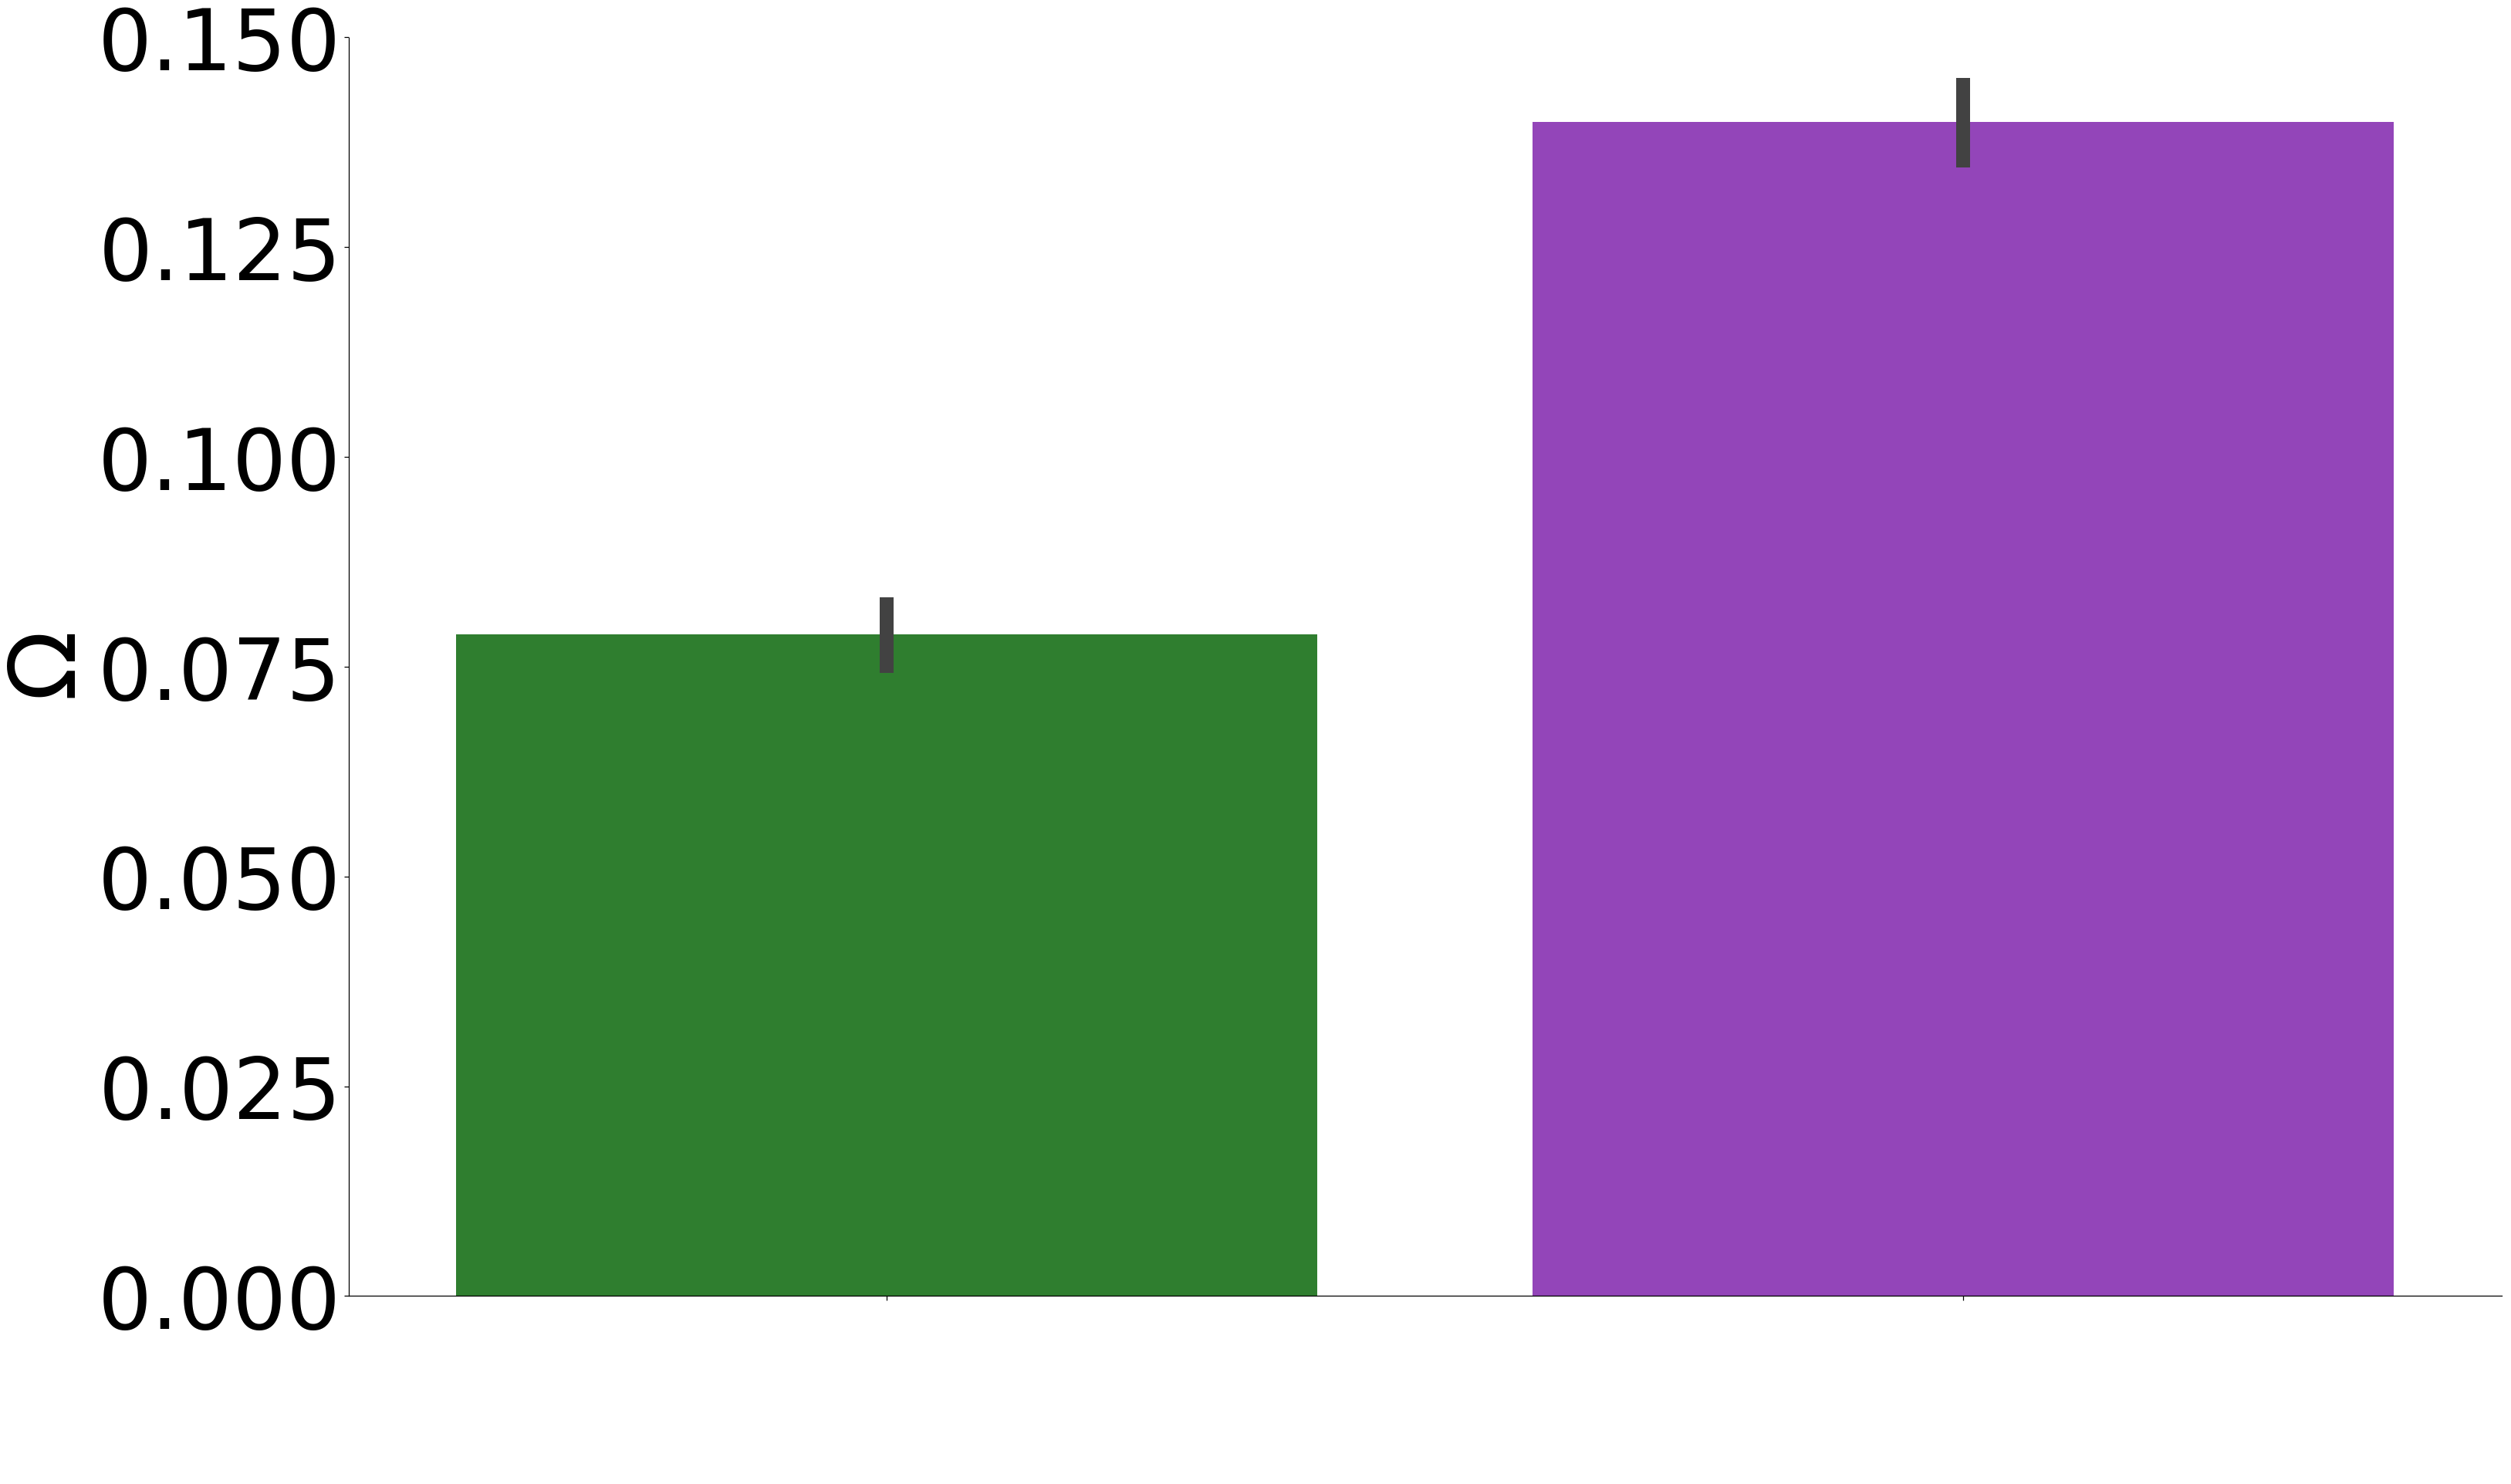

In [20]:
#separate these as insets
vol_df = all_obs_data.loc[all_obs_data.experiment == 'volatility']
conf_df = all_obs_data.loc[all_obs_data.experiment == 'conflict']

plt.figure(figsize=(50,30))
ax = sns.barplot(x="condition",y="cpp", data=vol_df, 
            ci=95, n_boot=1000,units="ID",order=["lv", "hv"], 
            palette=['forestgreen', 'darkorchid'])
plt.ylabel('$\Omega$')
plt.ylim([0,0.15])
ax.set_xticklabels(' ')
ax.set_xlabel(' ')
sns.despine()
plt.savefig('cpp_vol.pdf', dpi=600)

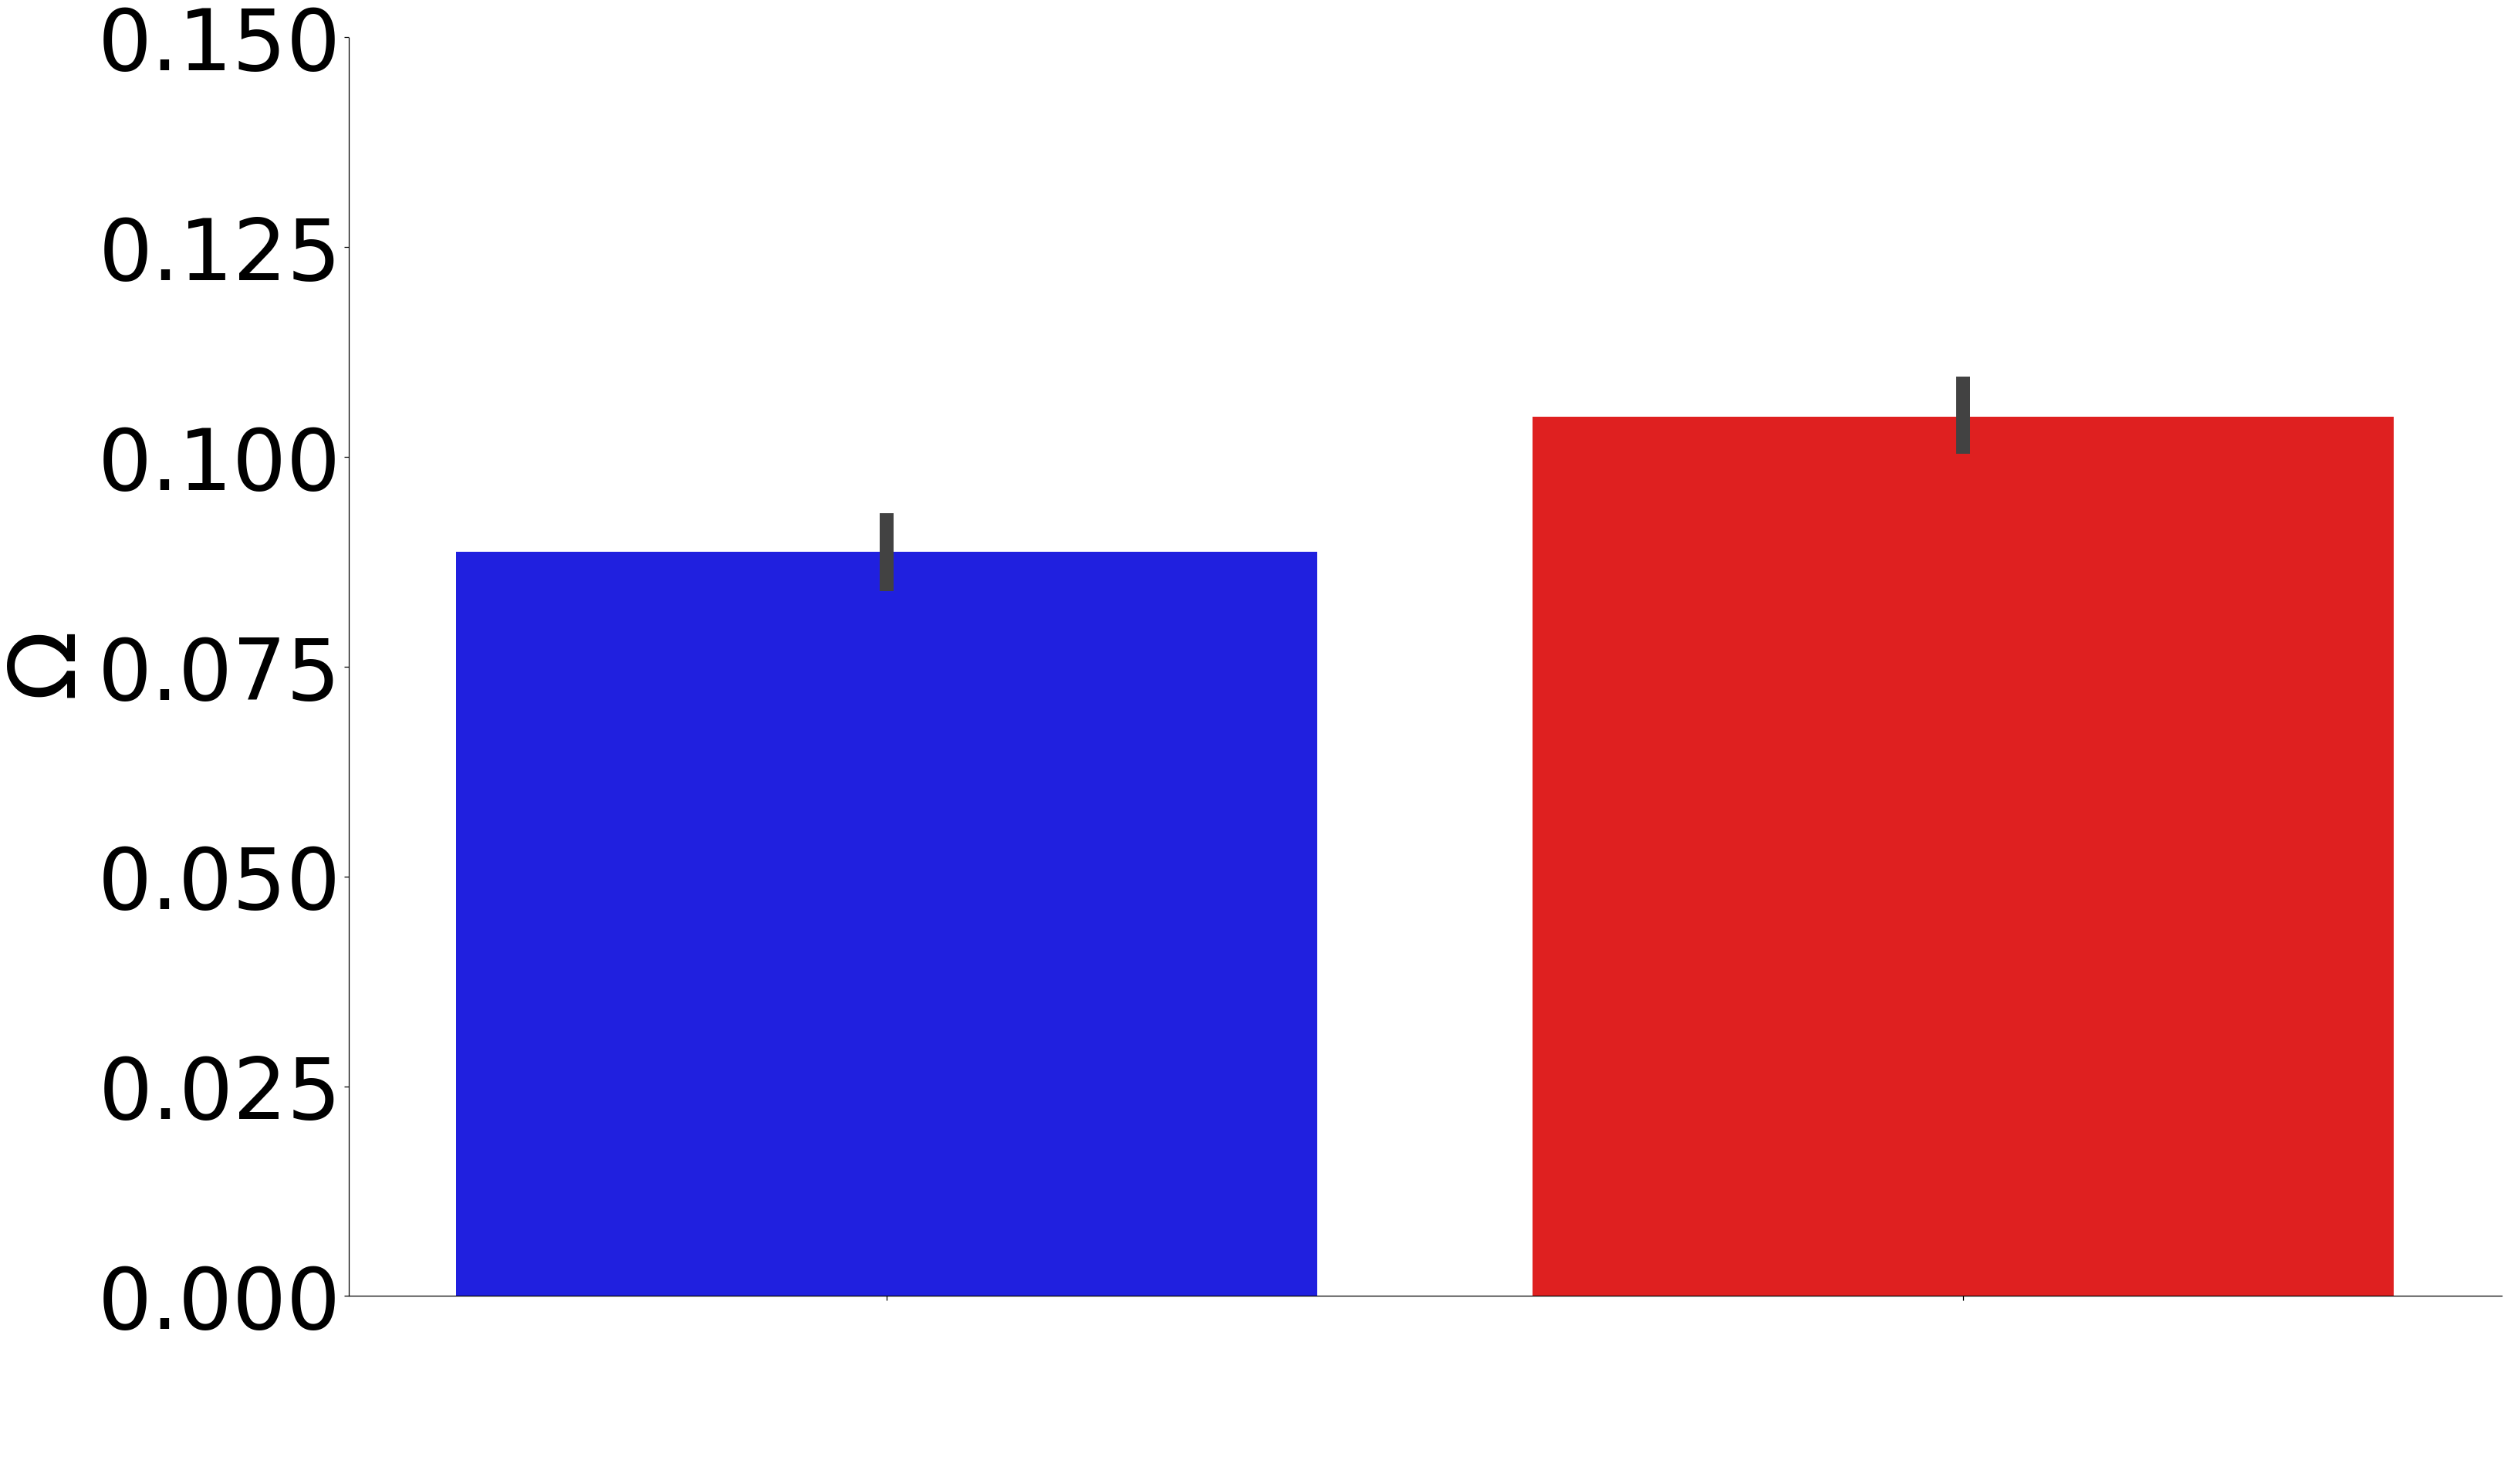

In [21]:
plt.figure(figsize=(50,30))
ax=sns.barplot(x="condition",y="cpp", data=conf_df, 
            ci=95, n_boot=1000,units="ID",order=["lc", "hc"], 
            palette=['blue', 'red'])
plt.ylabel('$\Omega$')
ax.set_xticklabels(' ')
ax.set_xlabel(' ')
plt.ylim([0,0.15])
sns.despine()
plt.savefig('cpp_conf.pdf', dpi=600)

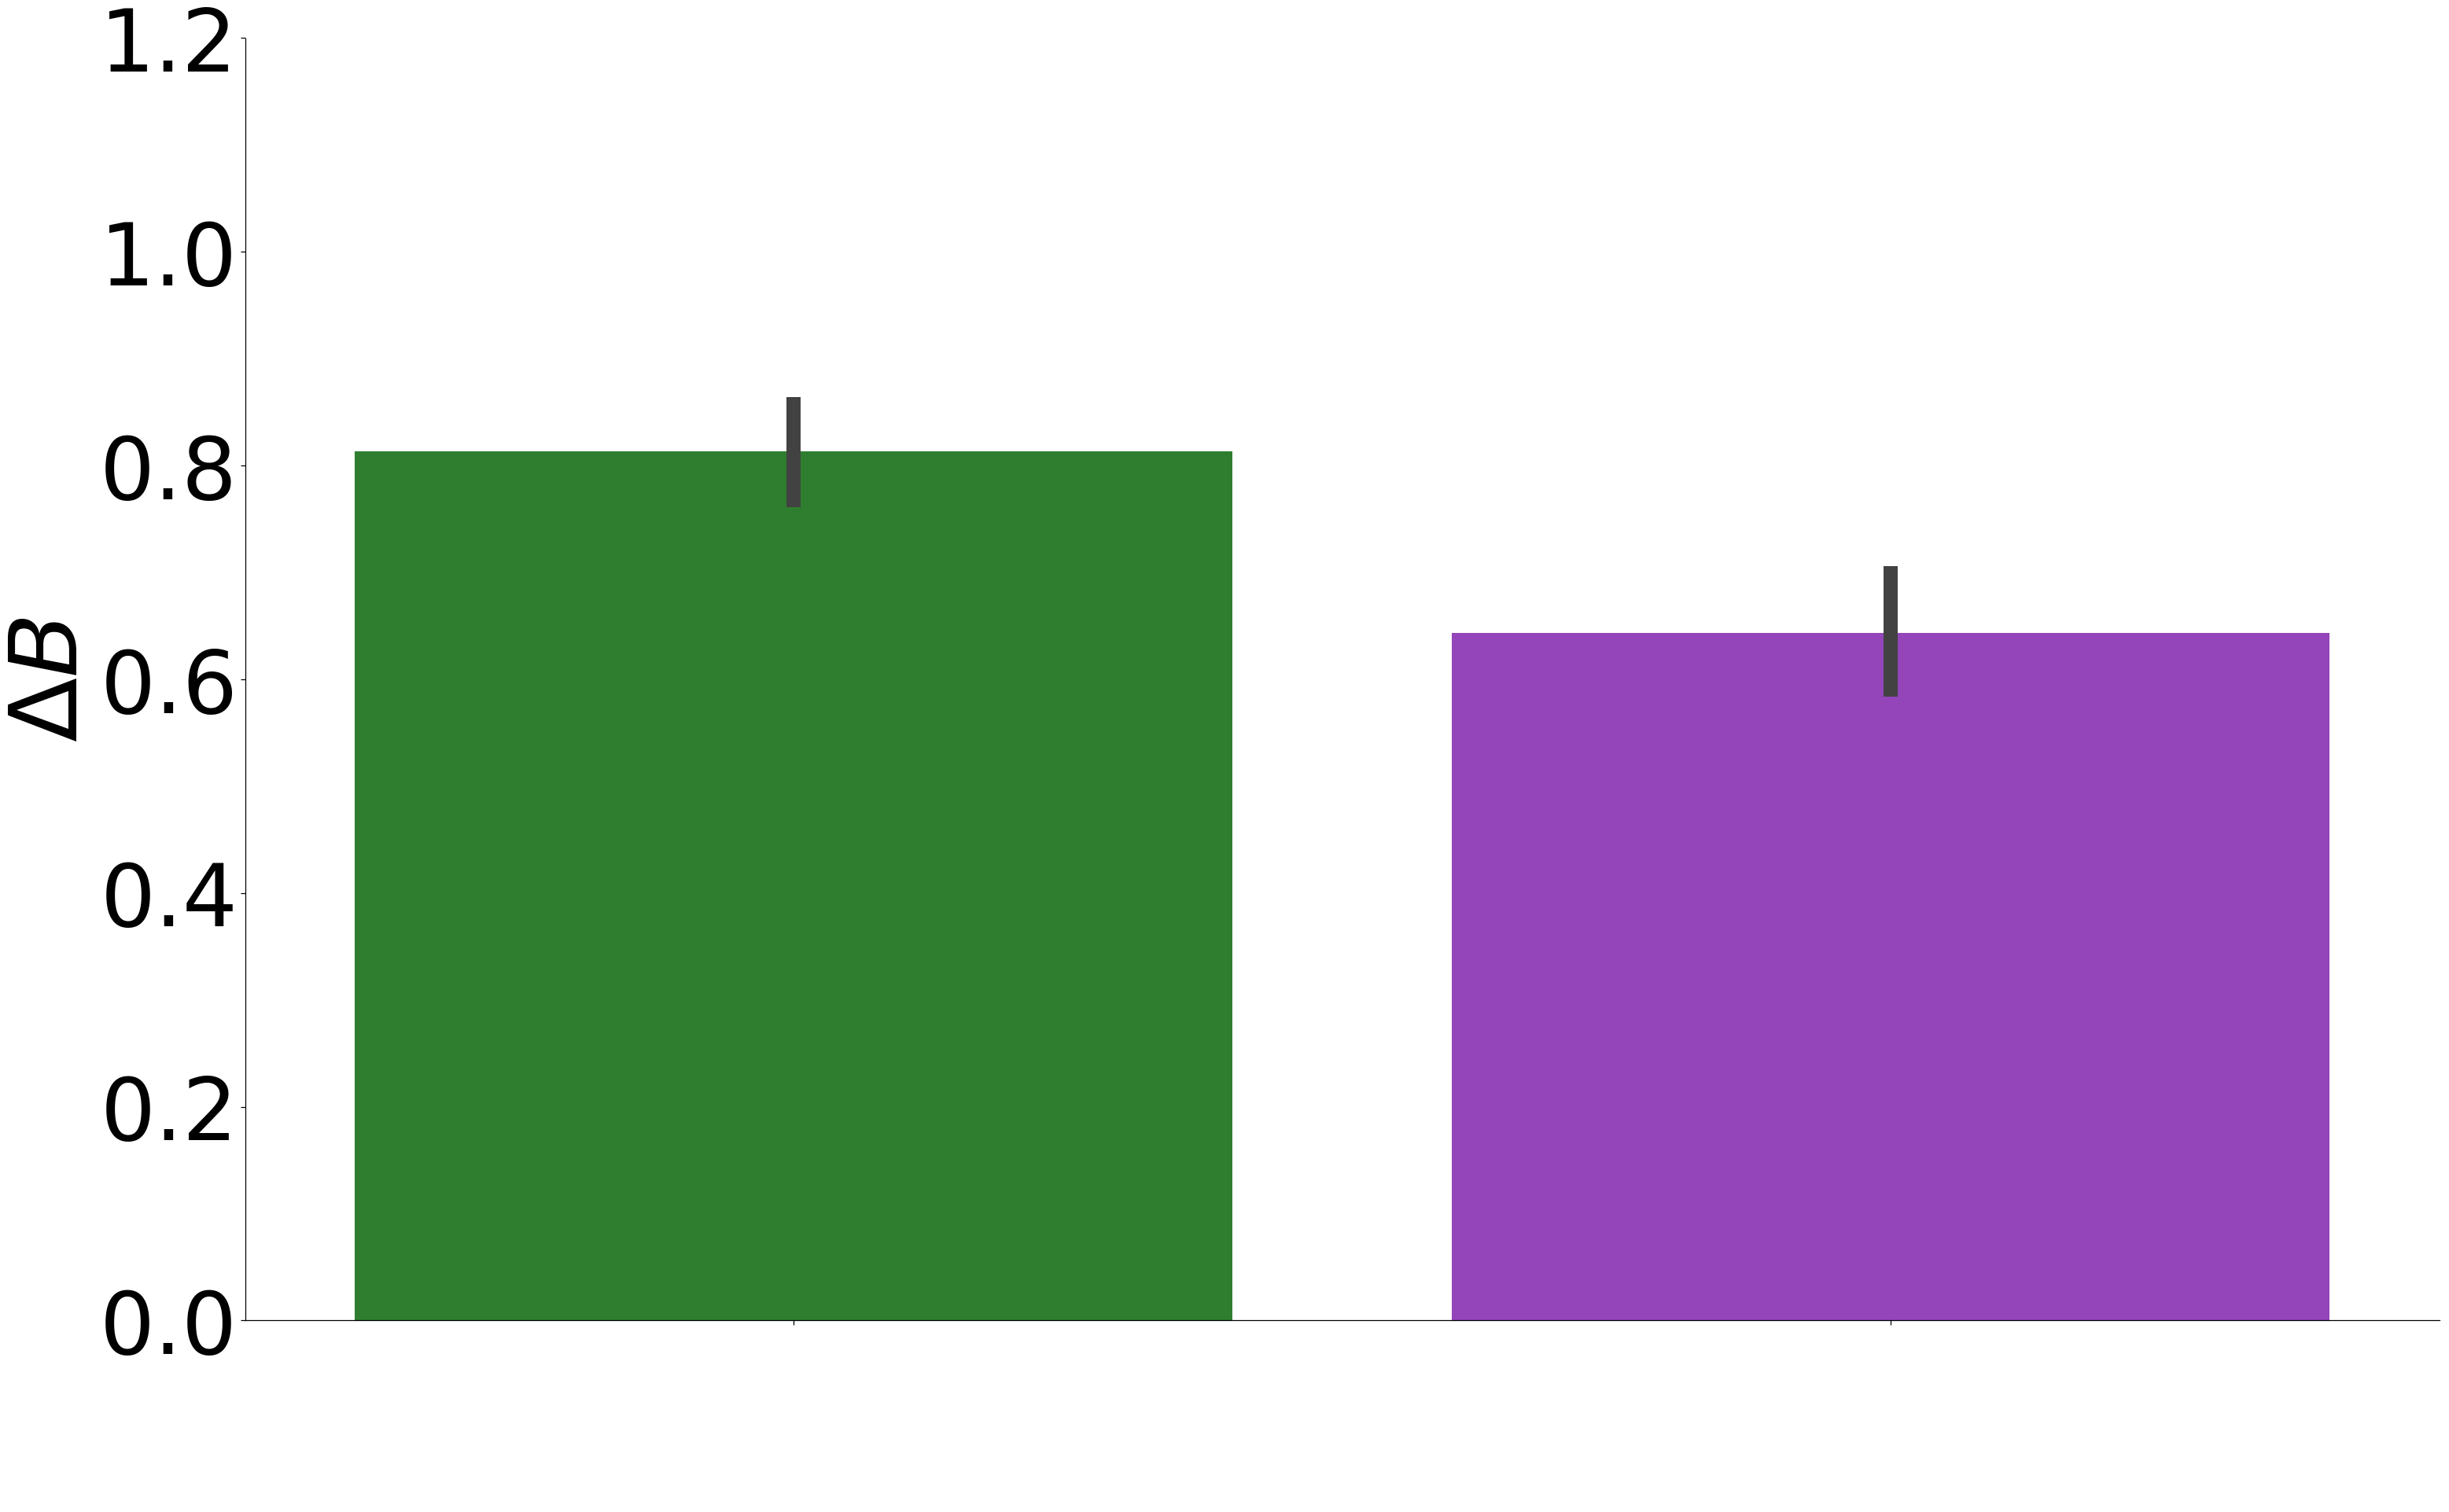

In [22]:
plt.figure(figsize=(50,30))
ax = sns.barplot(x="condition",y="ideal_B", data=vol_df, 
            ci=95, n_boot=1000,units="ID",order=["lv", "hv"], 
            palette=['forestgreen', 'darkorchid'])
plt.ylabel('$\Delta B$')
plt.ylim([0,1.2])
ax.set_xticklabels(' ')
ax.set_xlabel(' ')
sns.despine()
plt.savefig('B_vol.pdf', dpi=600)

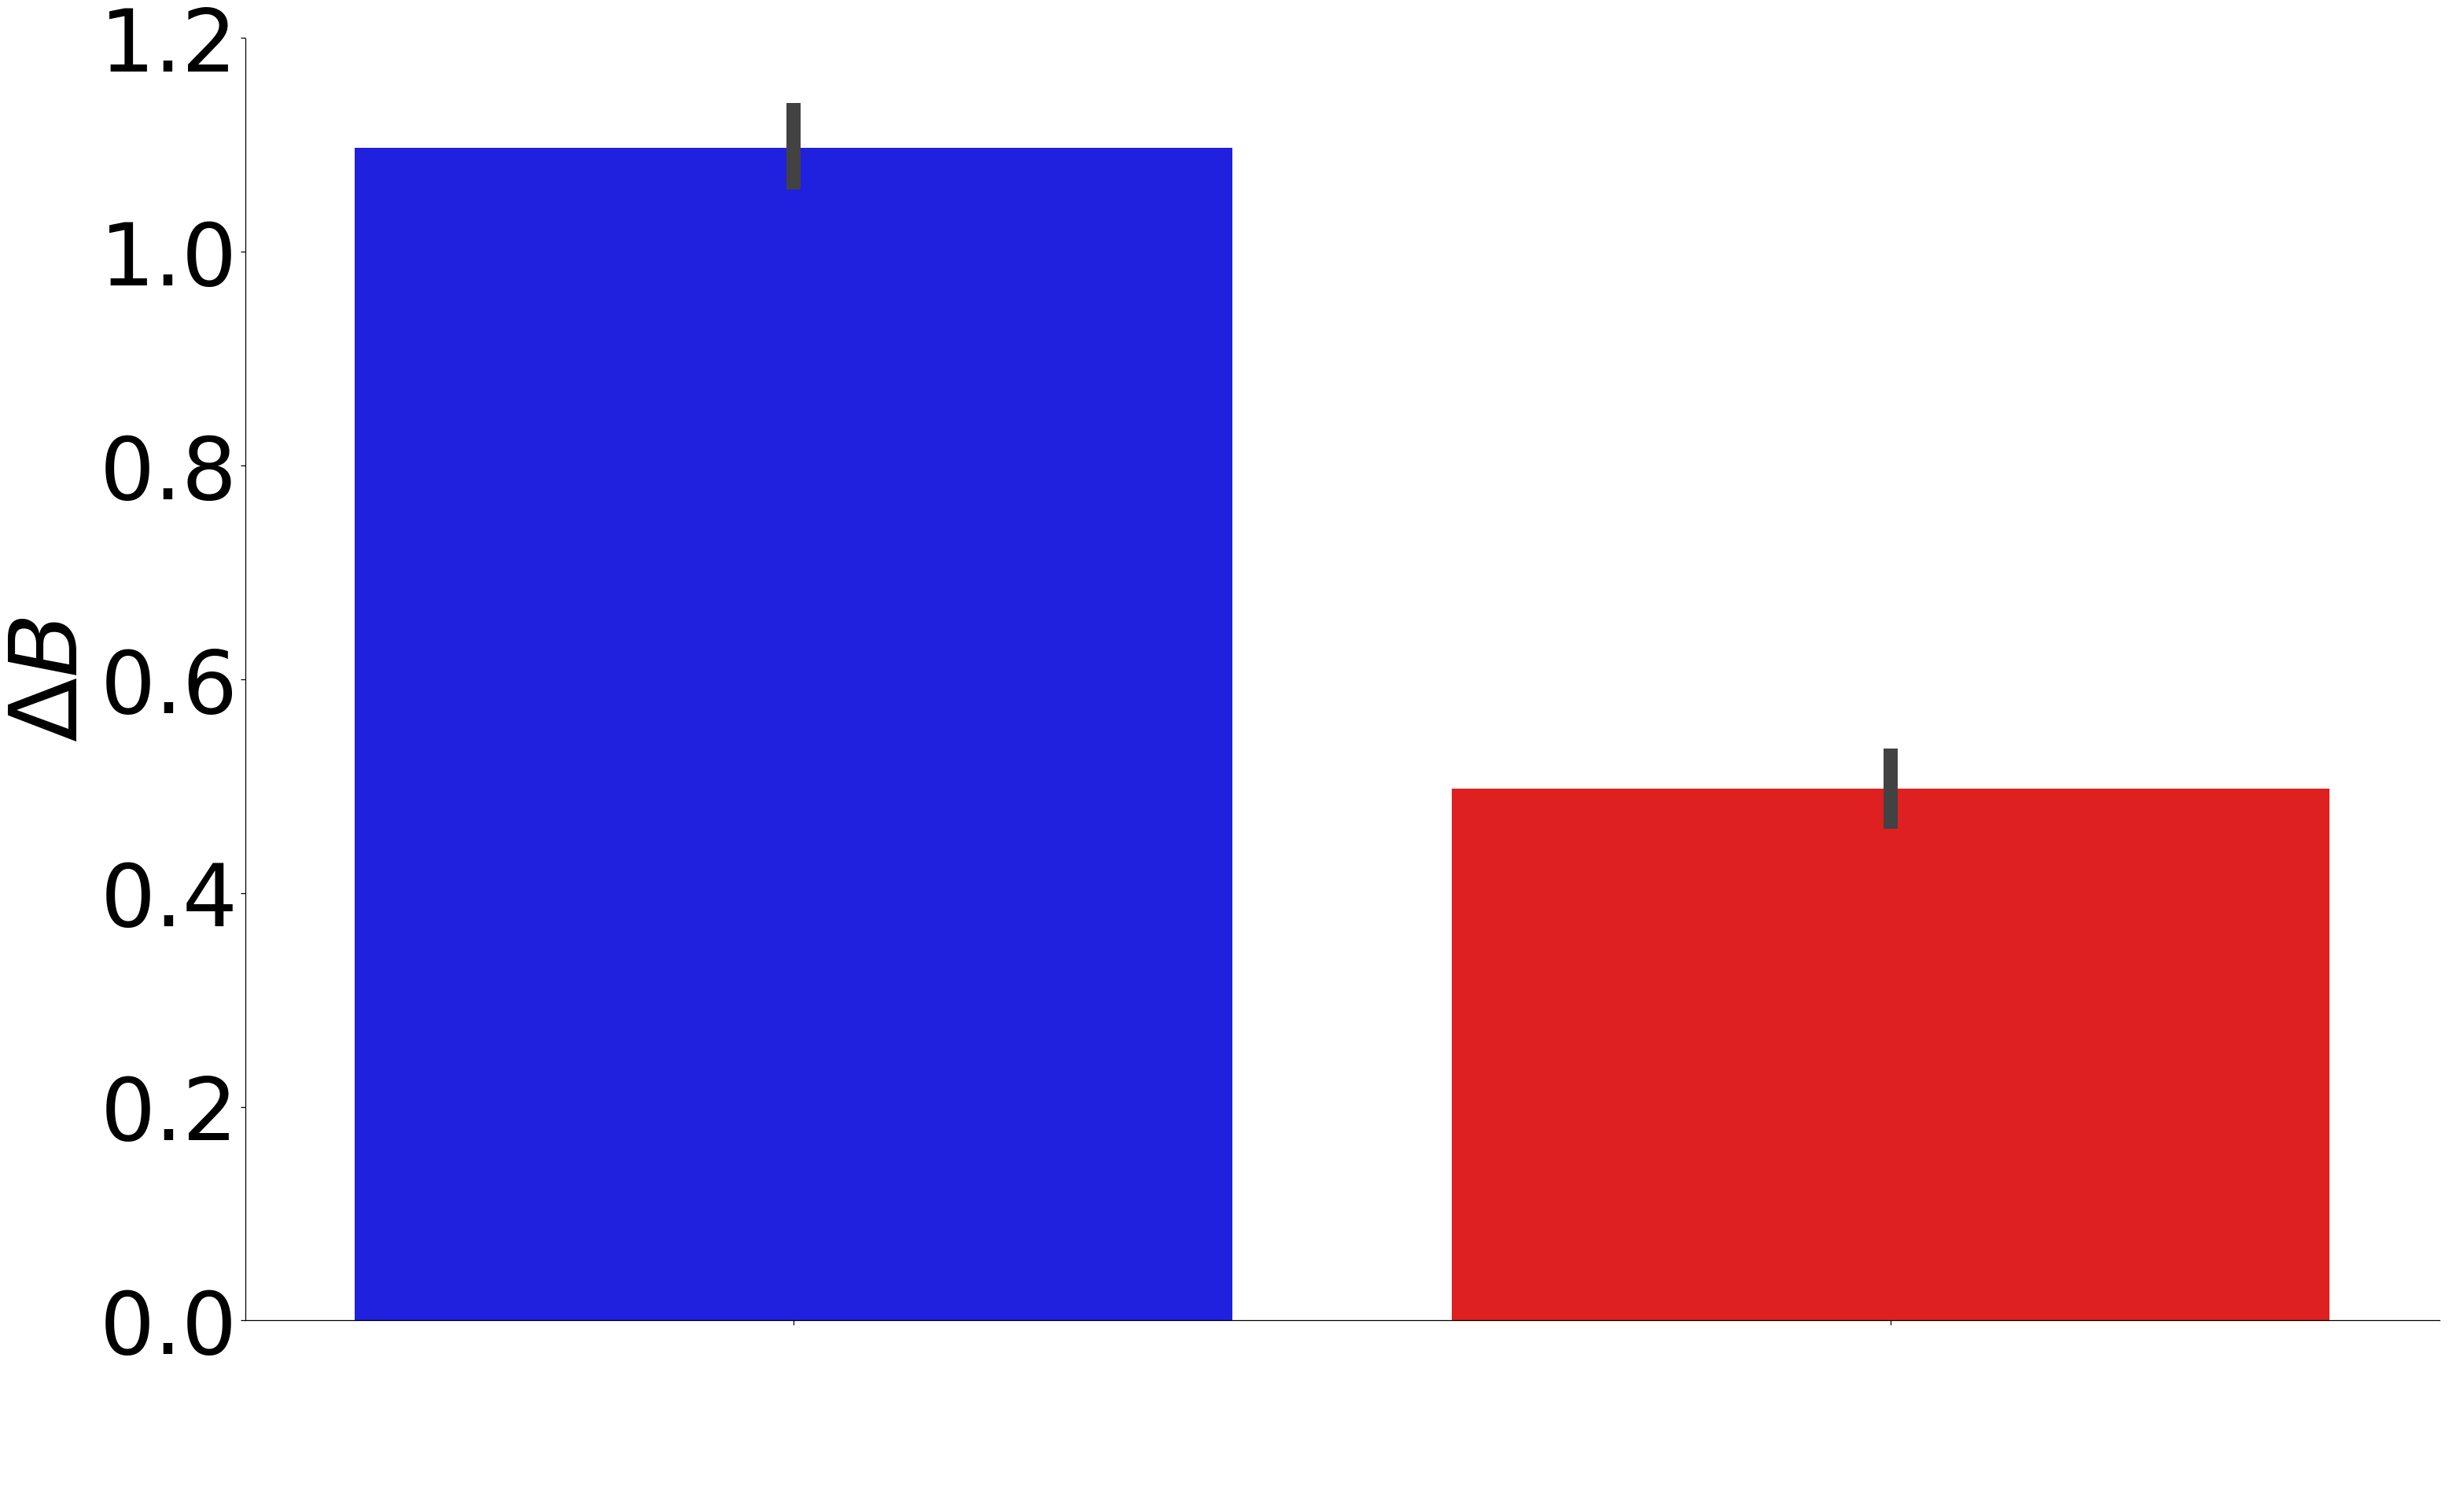

In [23]:
plt.figure(figsize=(50,30))
ax = sns.barplot(x="condition",y="ideal_B", data=conf_df, 
            ci=95, n_boot=1000,units="ID",order=["lc", "hc"], 
            palette=['blue', 'red'])
plt.ylabel('$\Delta B$')
plt.ylim([0,1.2])
ax.set_xticklabels(' ')
ax.set_xlabel(' ')
sns.despine()
plt.savefig('B_conf.pdf', dpi=600)

In [30]:
all_obs_data.loc[all_obs_data.cue_choice == 111, 'id_choice'] = 0
all_obs_data.loc[all_obs_data.cue_choice == 112, 'id_choice'] = 1

In [34]:
all_obs_data.loc[all_obs_data.high_p_cue == 111, 'p_id_solution'] = 0
all_obs_data.loc[all_obs_data.high_p_cue == 112, 'p_id_solution'] = 1

In [35]:
all_obs_data_sample_lc = all_obs_data[(all_obs_data.condition == 'lc') & (all_obs_data.ID == 761)] 

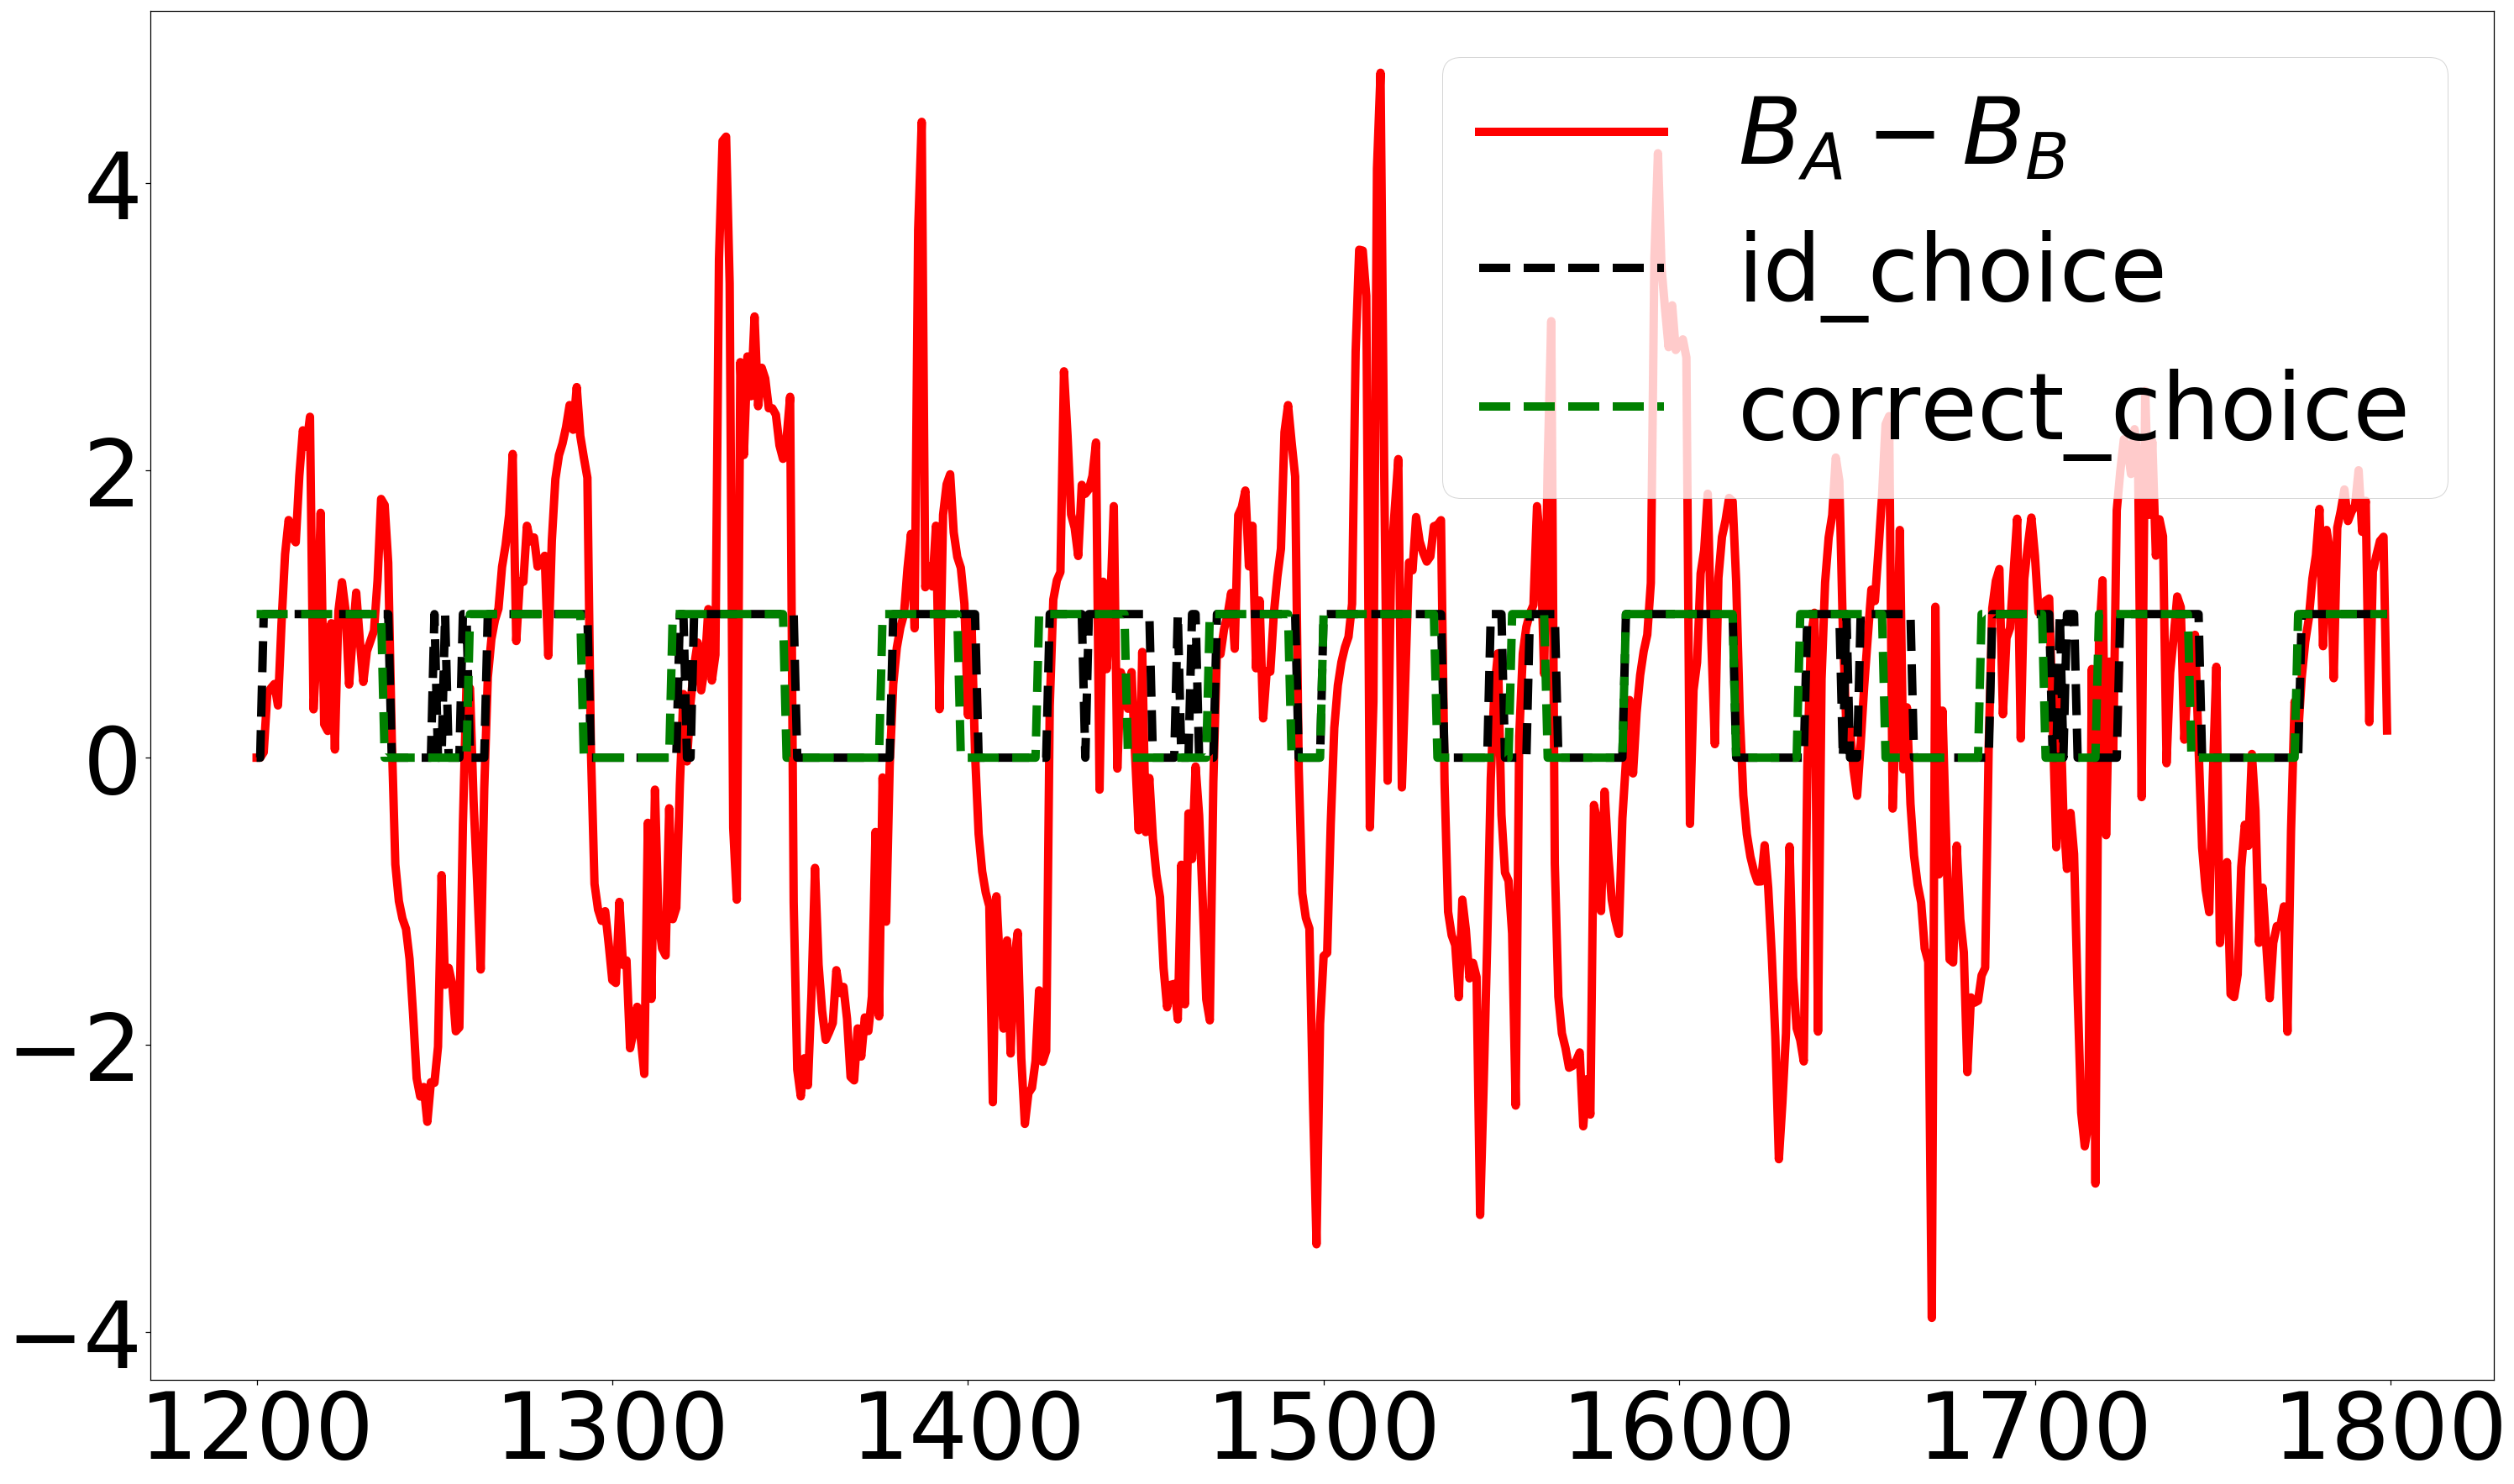

In [36]:
#use a low conflict sample to test direction
plt.figure(figsize=(50,30))
plt.plot(all_obs_data_sample_lc.target_B, 'r', label='$B_{A} - B_{B}$')
plt.plot(all_obs_data_sample_lc.id_choice, 'k--', label='id_choice')
plt.plot(all_obs_data_sample_lc.p_id_solution, 'g--', label='correct_choice')
plt.legend()

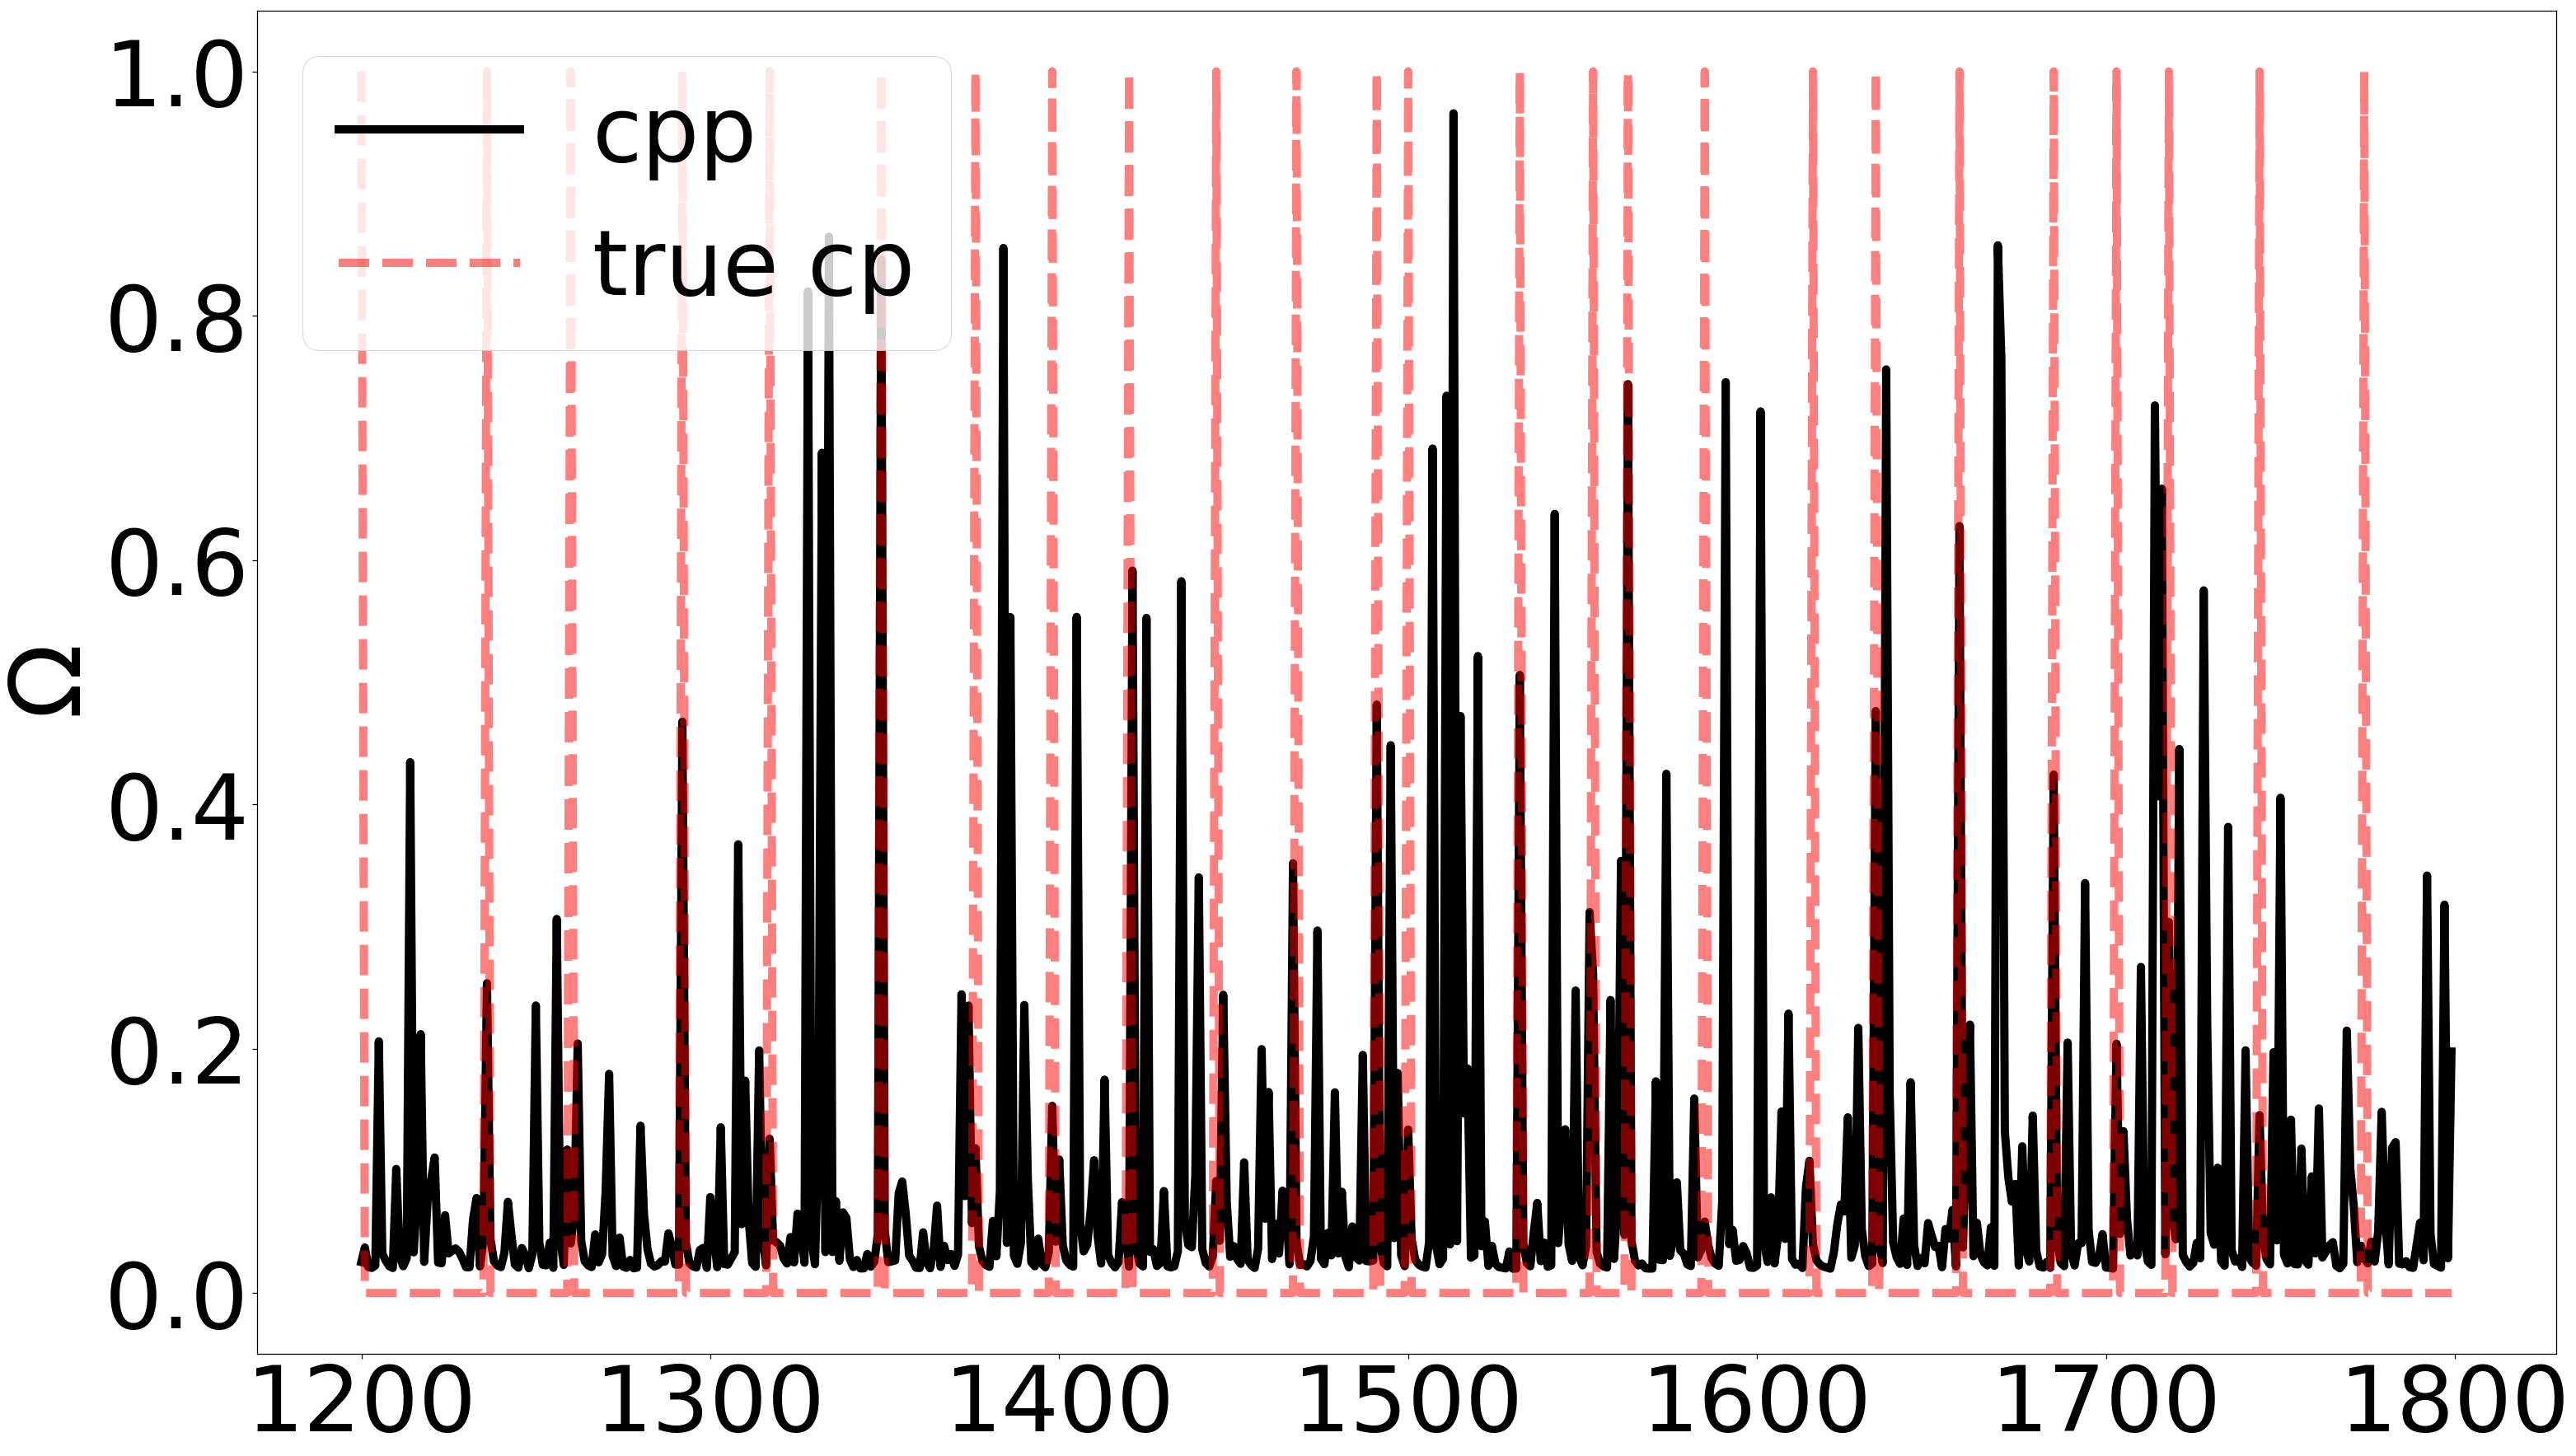

In [38]:
plt.figure(figsize=(50,30))
plt.plot(all_obs_data_sample_lc.cpp[0:600], 'k', label='cpp')
plt.plot(all_obs_data_sample_lc.cp_with_slow_fast[0:600], 'r--', alpha=0.5, label='true cp')
plt.ylabel('$\Omega$')
plt.legend(frameon=1,loc='upper left')

In [43]:
pd.DataFrame(list(range(3))).shift(1) # test

0
0  NaN
1  0.0
2  1.0

In [45]:
all_obs_data.head()

ID experiment condition  trial  shifted_epoch_trial  cp_with_slow_fast  \
0  761   conflict        hc      0                    0                1.0   
1  761   conflict        hc      1                    1                0.0   
2  761   conflict        hc      2                    2                0.0   
3  761   conflict        hc      3                    3                0.0   
4  761   conflict        hc      4                    4                0.0   

   obs_cp_with_slow_fast  p_id_accuracy        rt  lr_choice  ...  \
0                    0.0              1  0.711570        1.0  ...   
1                    1.0              0  0.681410        1.0  ...   
2                    0.0              1  0.767118        0.0  ...   
3                    0.0              0  0.507209        1.0  ...   
4                    0.0              1  0.656259        1.0  ...   

   total_trial_time  epoch_n  epoch_trial  n_epoch_trials  prop_112       cpp  \
0          2.385458      1.0            0              36  0.305556  0.099471   
1          1.939019      1.0            1              36  0.305556  0.035079   
2          2.498060      1.0            2              36  0.305556  0.023075   
3          1.742433      1.0            3              36  0.305556  0.019881   
4          2.350417      1.0            4              36  0.305556  0.018539   

    ideal_B  target_B  id_choice  p_id_solution  
0  0.000000  0.000000        0.0            0.0  
1 -1.241007  0.000000        1.0            0.0  
2 -0.595781 -1.241007        0.0            0.0  
3 -0.306135 -0.595781        1.0            0.0  
4 -0.139394 -0.306135        0.0            0.0  

[5 rows x 30 columns]

In [47]:
all_obs_data['cpp_shift'] = all_obs_data.groupby(['ID']).cpp.shift(1).reset_index(drop=True)
all_obs_data['ideal_B_shift'] = all_obs_data.groupby(['ID']).ideal_B.shift(1).reset_index(drop=True)

In [49]:
all_obs_data = all_obs_data.rename(index=str, columns={"p_id_accuracy": "response", 
                                                       "p_id_solution": "stimulus",
                                                        "ID": "subj_idx"})
all_obs_data = all_obs_data[['response', 'stimulus', 'rt', 'condition', 
                             'subj_idx', 'ideal_B_shift', 'cpp_shift']] 
# #use target-based belief in reward difference (b_t0 - b_t1)
all_obs_data = all_obs_data.rename(index=str, columns={'ideal_B_shift': 'B'})
all_obs_data = all_obs_data.rename(index=str, columns={'cpp_shift': 'cpp'})

# all_obs_data = all_obs_data[(all_obs_data.rt<0.6)]
# all_obs_data.reset_index(drop=True, inplace=True)

In [61]:
all_obs_data=all_obs_data.dropna()

In [63]:
all_obs_data.isna().sum()

response     0
stimulus     0
rt           0
condition    0
subj_idx     0
B            0
cpp          0
dtype: int64

In [62]:
all_obs_data['condition'] = all_obs_data['condition'].str.strip()
all_obs_data.head()

/home/krista/anaconda3/envs/hddm_0.6/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


response  stimulus        rt condition  subj_idx         B       cpp
1         0       0.0  0.681410        hc       761  0.000000  0.099471
2         1       0.0  0.767118        hc       761 -1.241007  0.035079
3         0       0.0  0.507209        hc       761 -0.595781  0.023075
4         1       0.0  0.656259        hc       761 -0.306135  0.019881
5         1       0.0  0.342321        hc       761 -0.139394  0.018539

In [51]:
np.unique(all_obs_data.subj_idx), np.unique(all_obs_data.condition), len(np.unique(all_obs_data.subj_idx)),len(np.unique(all_obs_data.condition))

(array([761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773,
        774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784]),
 array(['hc', 'hv', 'lc', 'lv'], dtype=object),
 24,
 4)

In [52]:
#columns for sparse df used for HDDM
all_obs_data.columns

Index([u'response', u'stimulus', u'rt', u'condition', u'subj_idx', u'B',
       u'cpp'],
      dtype='object')

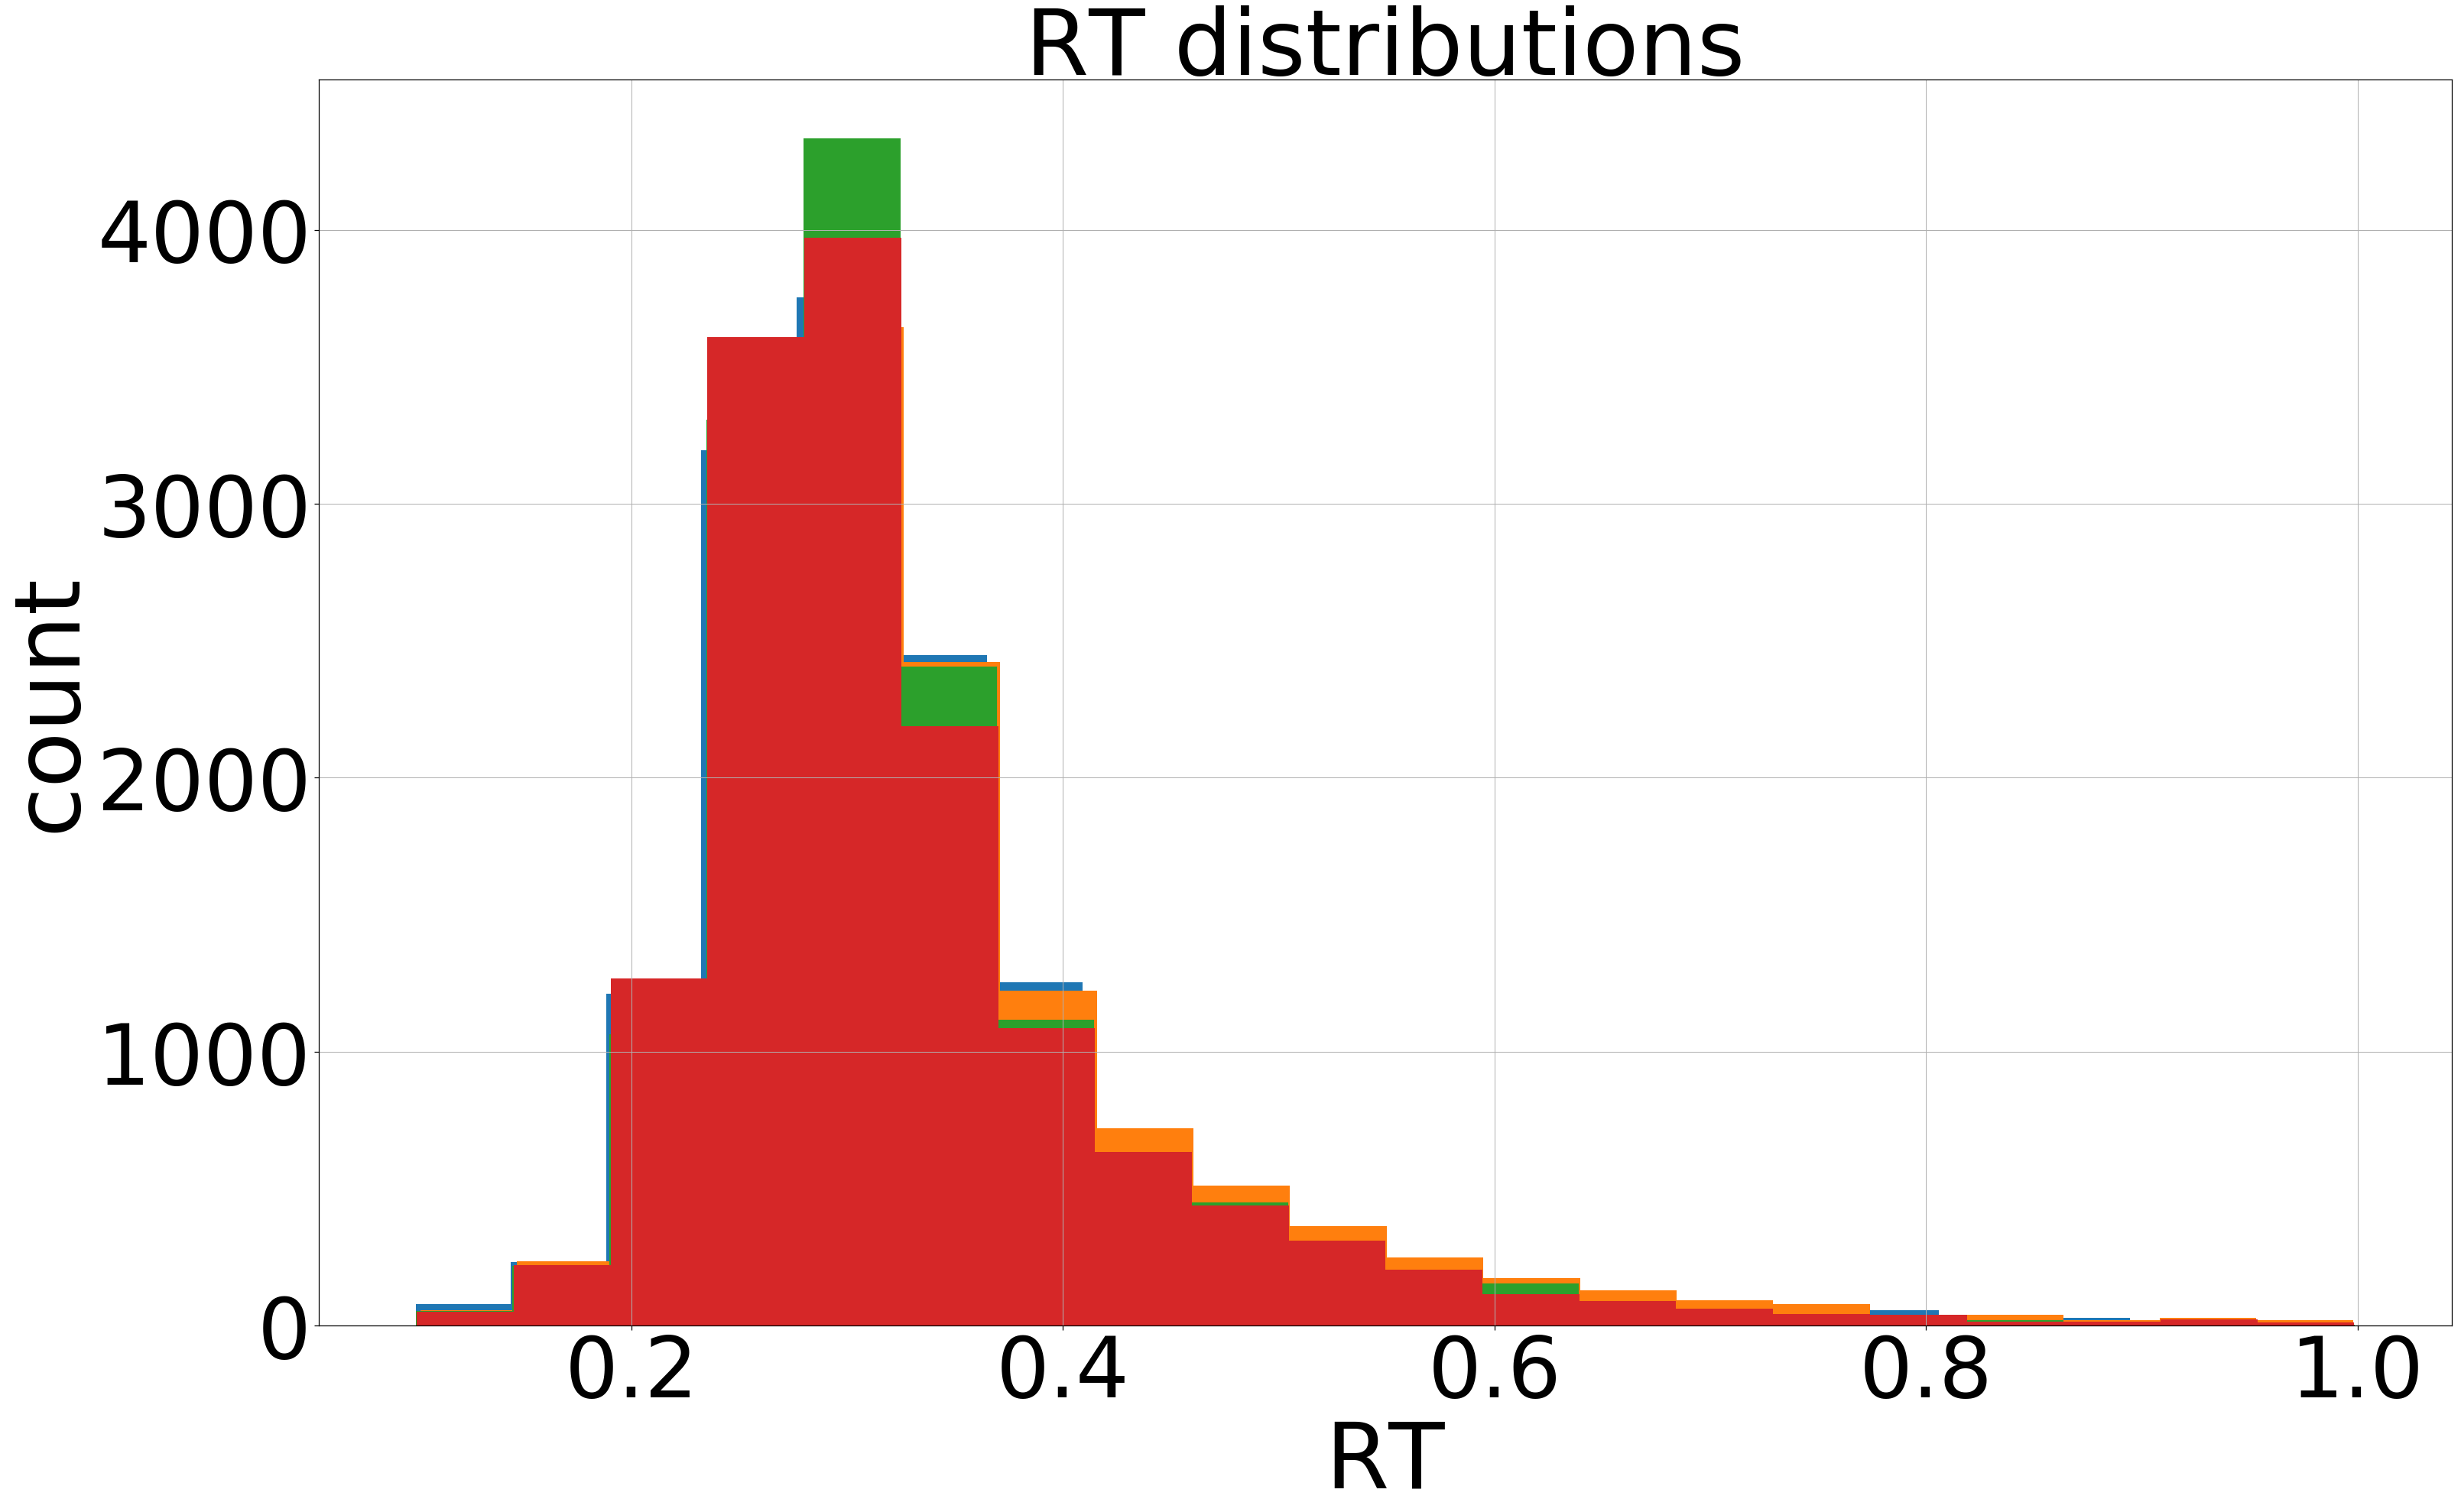

In [53]:
fig=plt.figure(figsize=(50,30))
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in all_obs_data.groupby('condition'):
    subj_data.rt.hist(bins=20, histtype='stepfilled', ax=ax)

Text(0,0.5,'B')

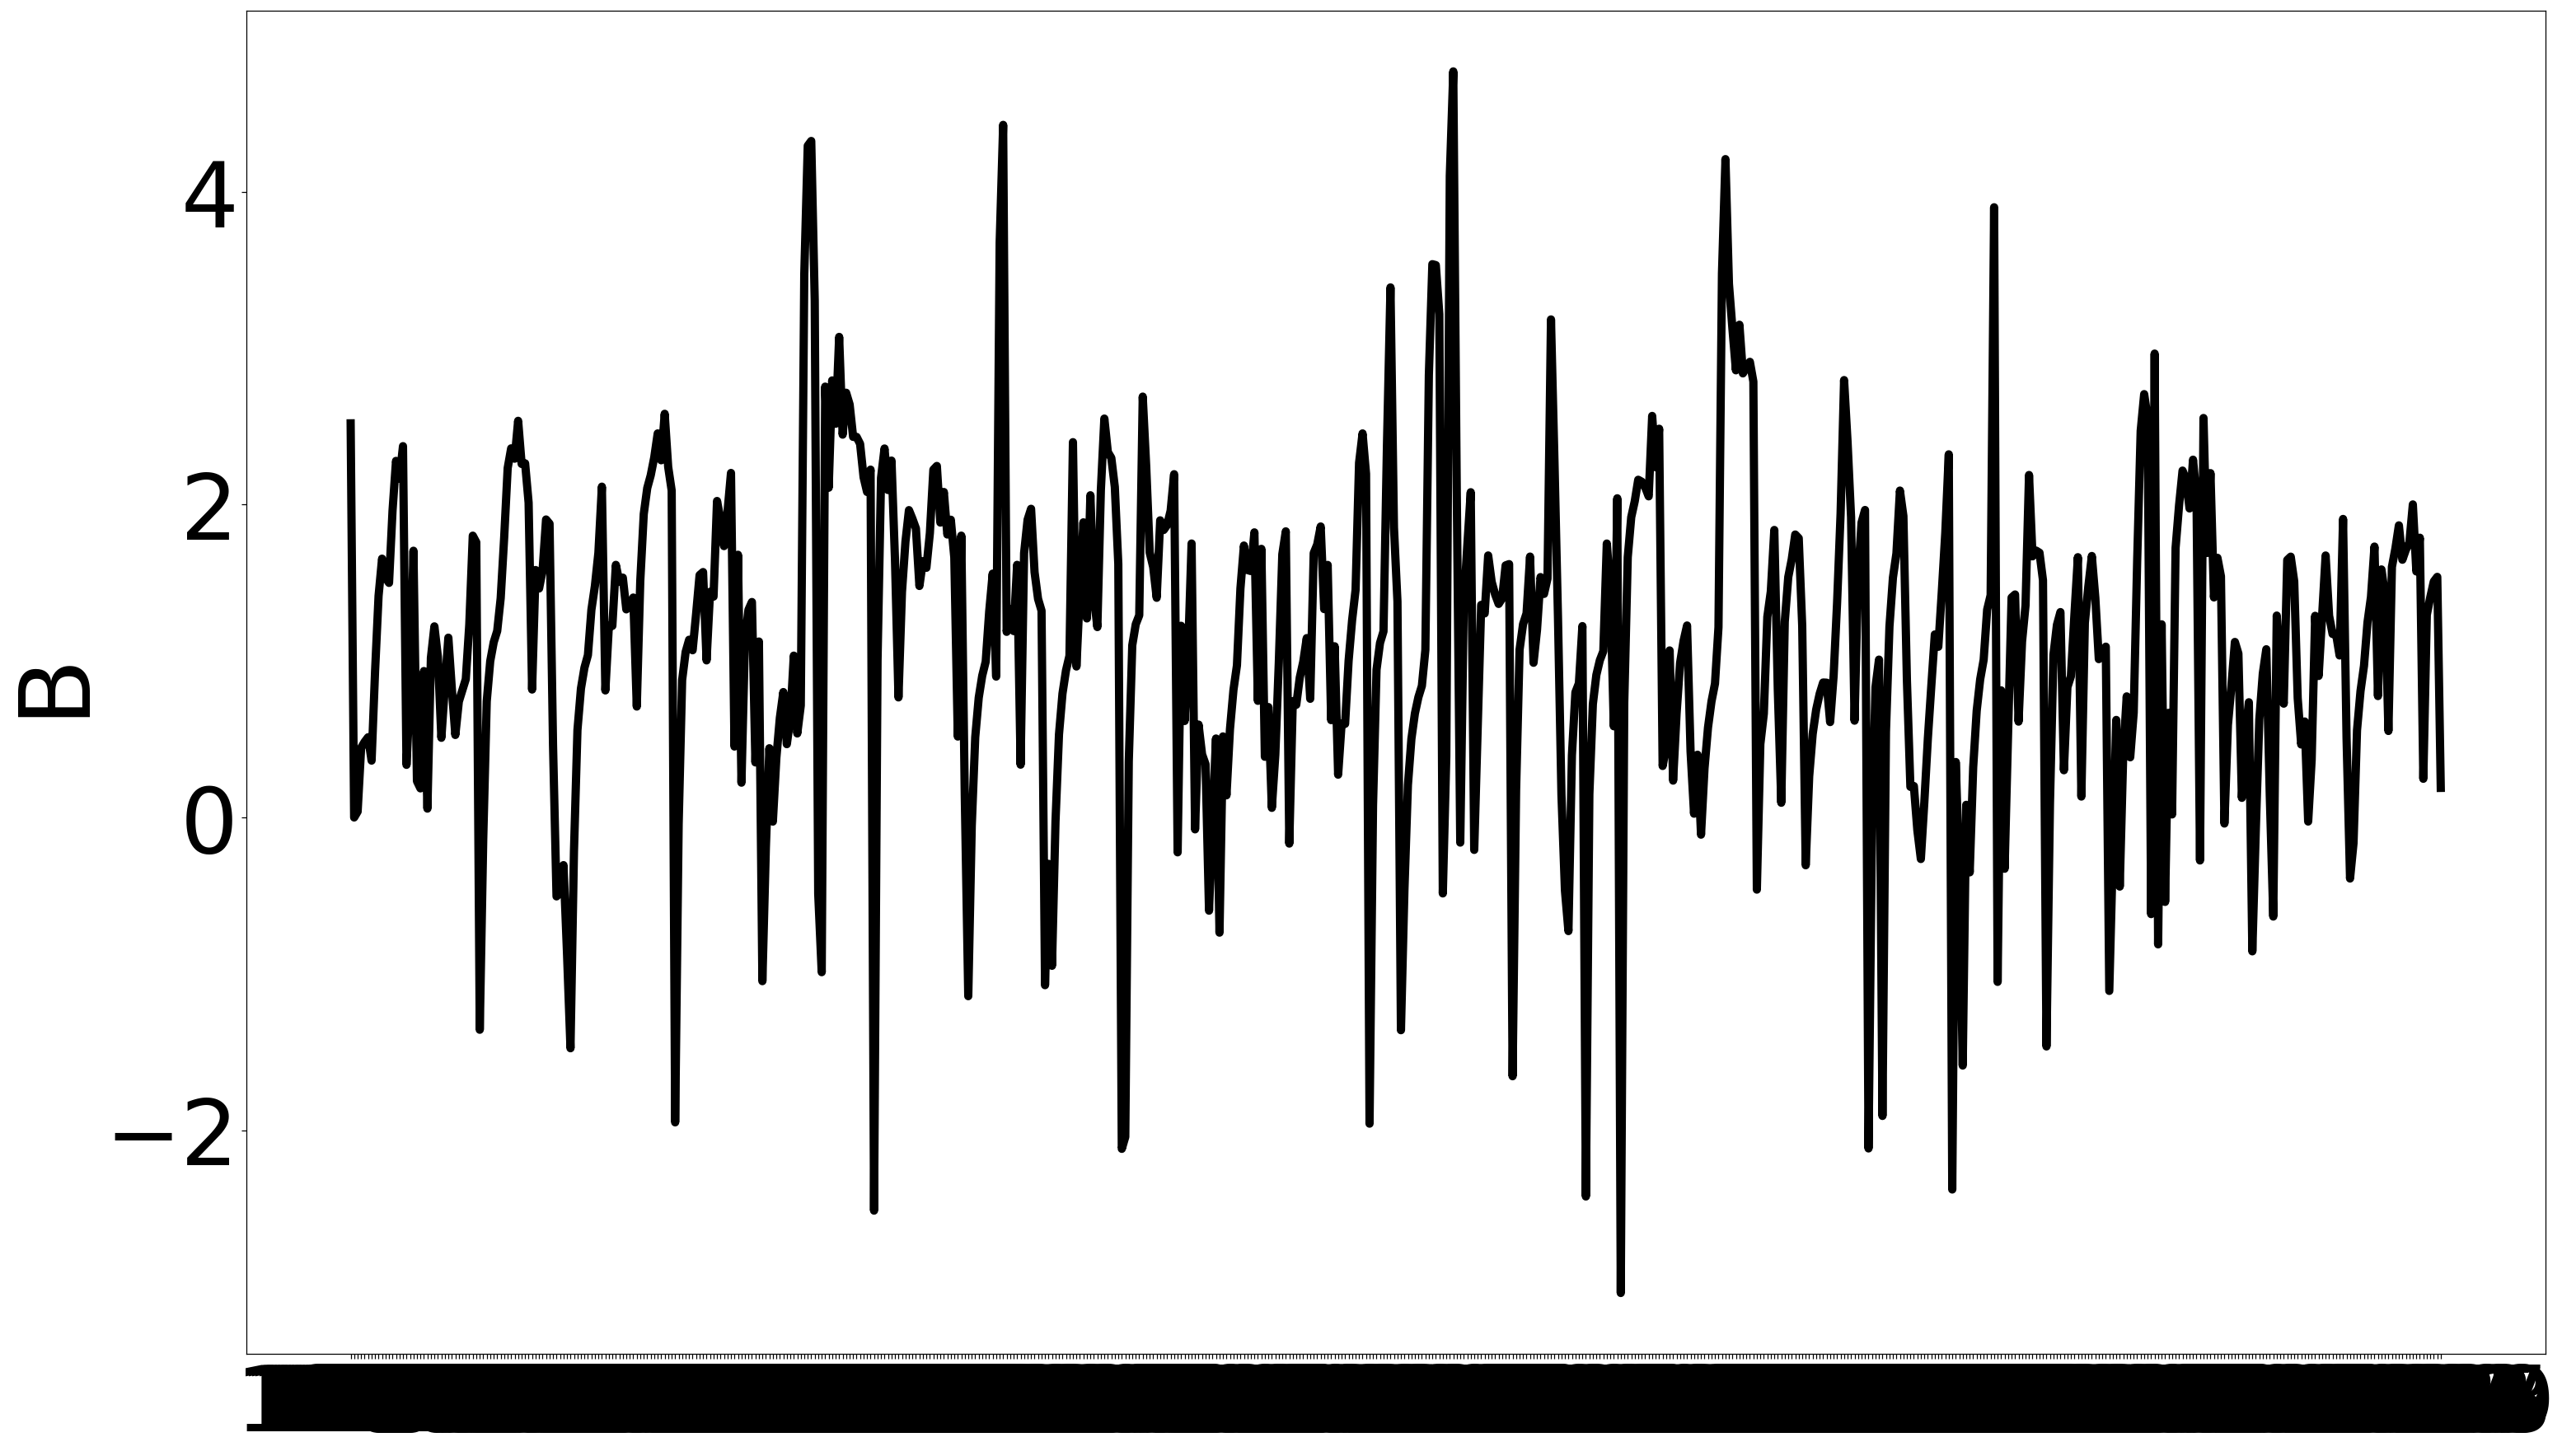

In [54]:
plt.figure(figsize=(50,30))
plt.plot(all_obs_data.B[(all_obs_data.subj_idx == 761) & (all_obs_data.condition == 'lc')], 'k')
plt.ylabel('B')

Text(0,0.5,'stimulus selected')

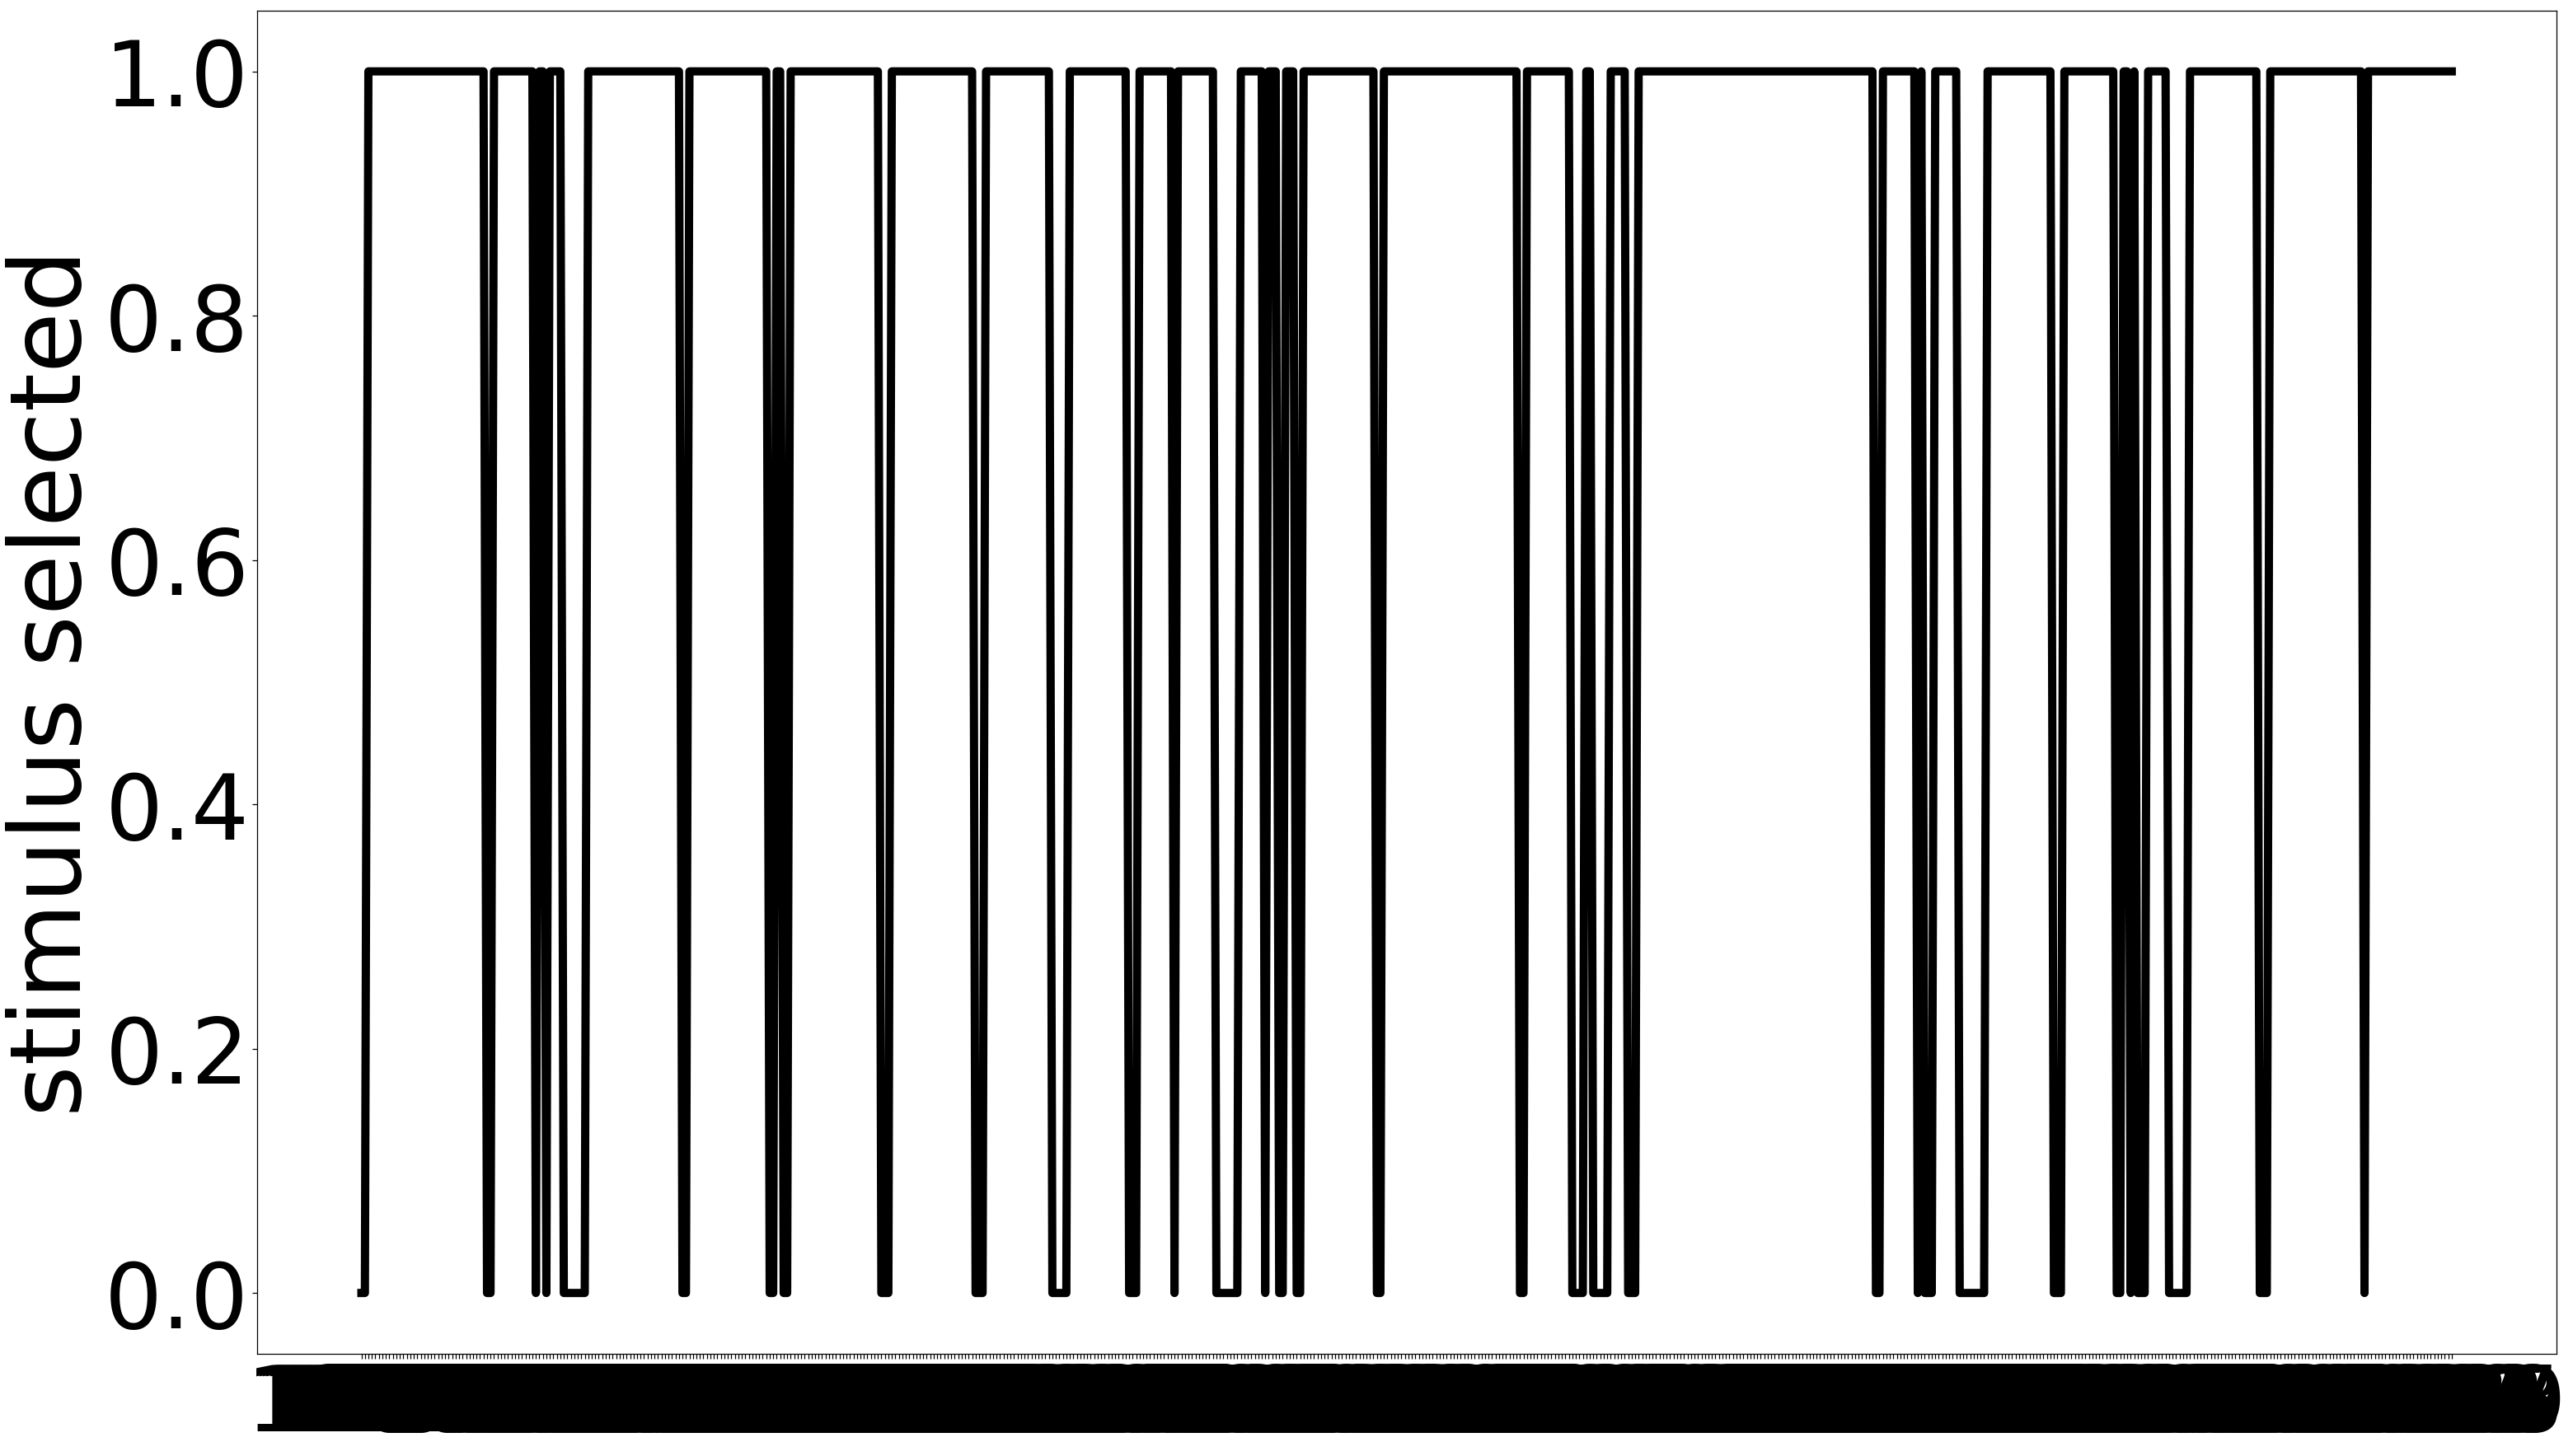

In [55]:
plt.figure(figsize=(50,30))
plt.plot(all_obs_data.response[(all_obs_data.subj_idx == 761) & (all_obs_data.condition == 'lc')], 'k')
plt.ylabel('stimulus selected')

Text(0,0.5,'obs. rt')

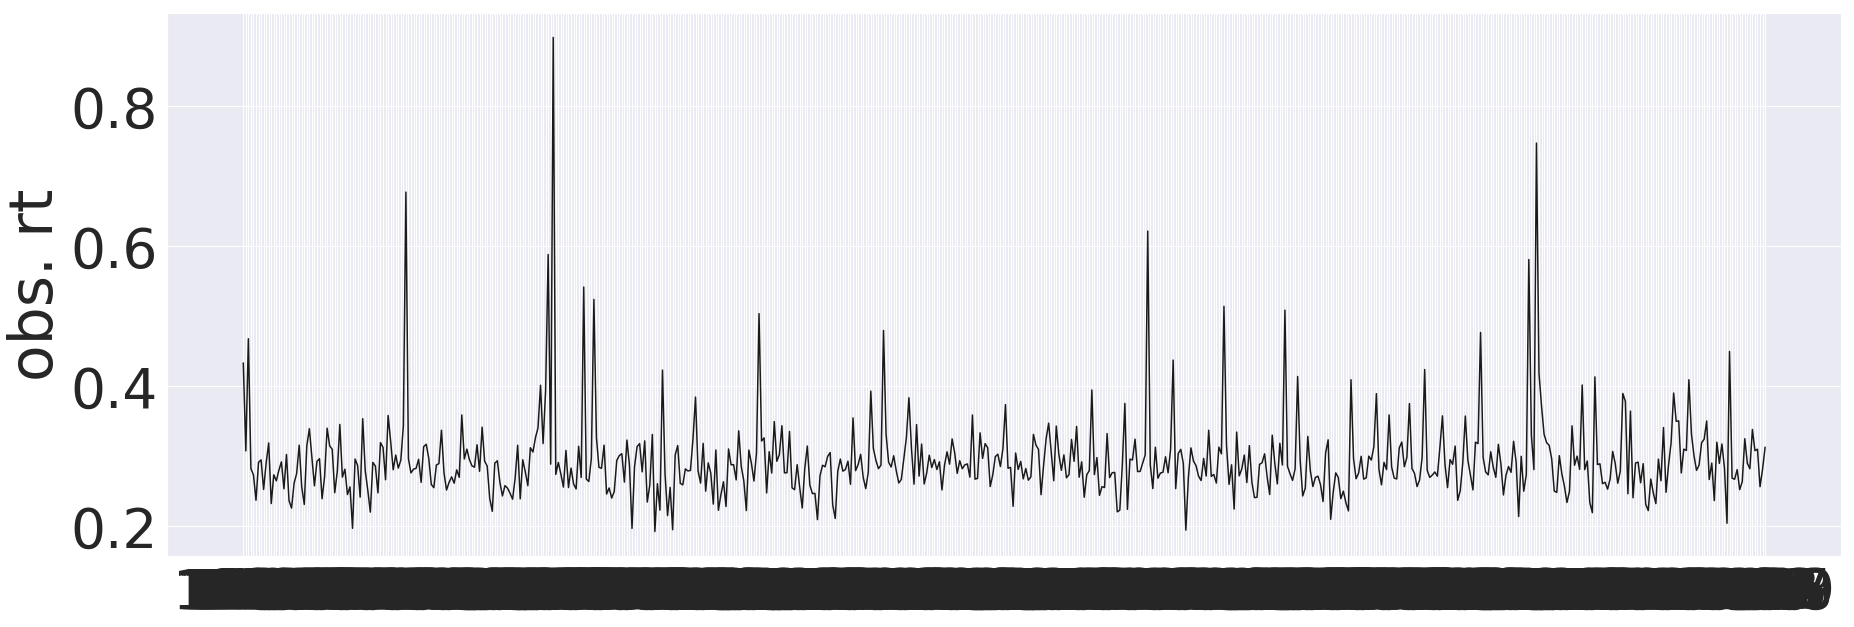

In [56]:
plt.rcParams['figure.figsize'] = 30, 10
sns.set(font_scale=5)
fig = plt.figure()
plt.plot(all_obs_data.rt[(all_obs_data.subj_idx == 761) & (all_obs_data.condition == 'lc')], 'k')
plt.ylabel('obs. rt')

Text(0,0.5,'correct stimulus')

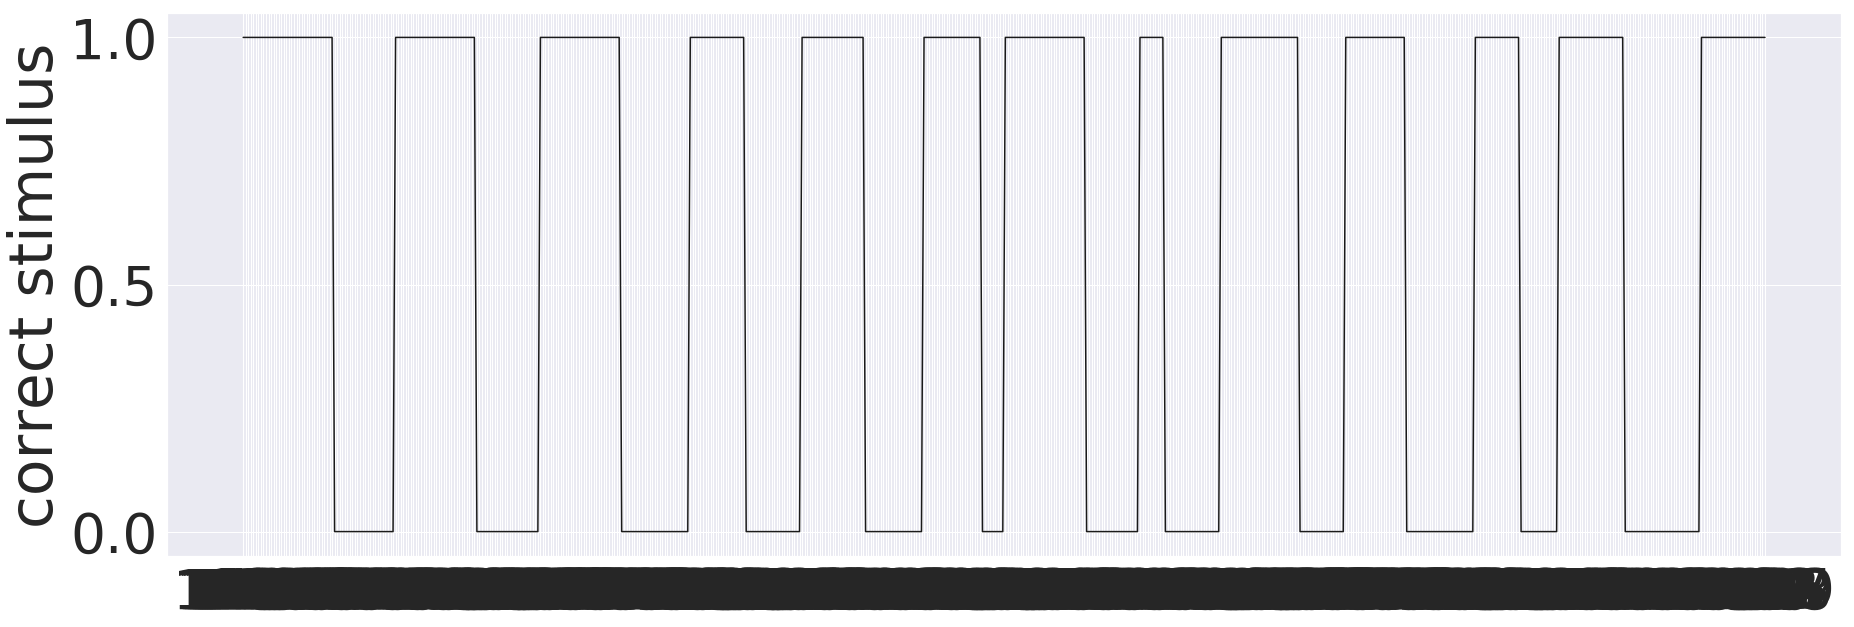

In [57]:
plt.rcParams['figure.figsize'] = 30, 10
sns.set(font_scale=5)
plt.plot(all_obs_data.stimulus[(all_obs_data.subj_idx == 761) & (all_obs_data.condition == 'lc')], 'k')
plt.ylabel('correct stimulus')

In [91]:
n_samples, n_burned_samples, n_thin = 10000, 500, 0

# n_samples, n_burned_samples, n_thin = 10, 5, 0 # min. samples to test the workflow

In [92]:
#intercept model
intercept_model=['a~1', 'v~1'] #true intercept only; "flat", no predictors, but all parameters estimated (all parameters estimated in other reg. models, so only diff. is lack of predictors)
intercept_model = hddm.HDDMRegressor(all_obs_data, intercept_model, bias=False)
intercept_model.find_starting_values()
intercept_model.sample(n_samples, burn=n_burned_samples,   dbname='intercept_only_obs_reg_simple_acc.db',db='pickle')

Adding these covariates:
['a_Intercept']
Adding these covariates:
['v_Intercept']
 [-----------------100%-----------------] 10001 of 10000 complete in 15003.5 sec

In [93]:
a_cpp_v_B_obs_reg = hddm.HDDMRegressor(all_obs_data,['a~cpp', 'v~B'],bias=False)
a_cpp_v_B_obs_reg.find_starting_values()
a_cpp_v_B_obs_reg.sample(n_samples,burn=n_burned_samples,   dbname='a_cpp_v_B_obs_reg_simple_acc.db', db='pickle')

Adding these covariates:
['a_Intercept', 'a_cpp']
Adding these covariates:
['v_Intercept', 'v_B']
 [-----------------100%-----------------] 10001 of 10000 complete in 23444.5 sec

In [94]:
v_cpp_a_B_obs_reg = hddm.HDDMRegressor(all_obs_data,[ 'v~cpp', 'a~B'],bias=False)
v_cpp_a_B_obs_reg.find_starting_values()
v_cpp_a_B_obs_reg.sample(n_samples,burn=n_burned_samples,   dbname='v_cpp_a_B_obs_reg_simple_acc.db', db='pickle')

Adding these covariates:
['v_Intercept', 'v_cpp']
Adding these covariates:
['a_Intercept', 'a_B']
 [-----------------100%-----------------] 10001 of 10000 complete in 25574.1 sec

In [95]:
a_cpp_obs_reg = hddm.HDDMRegressor(all_obs_data,['a~cpp'],bias=False)
a_cpp_obs_reg.find_starting_values()
a_cpp_obs_reg.sample(n_samples,burn=n_burned_samples,   dbname='a_cpp_obs_reg_simple_acc.db', db='pickle')

Adding these covariates:
['a_Intercept', 'a_cpp']
 [-----------------100%-----------------] 10001 of 10000 complete in 13076.1 sec

In [96]:
v_cpp_obs_reg = hddm.HDDMRegressor(all_obs_data,['v~cpp'],bias=False)
v_cpp_obs_reg.find_starting_values()
v_cpp_obs_reg.sample(n_samples,burn=n_burned_samples,   dbname='v_cpp_obs_reg_simple_acc.db', db='pickle')

Adding these covariates:
['v_Intercept', 'v_cpp']
 [-----------------100%-----------------] 10001 of 10000 complete in 15558.5 sec

In [97]:
a_B_obs_reg = hddm.HDDMRegressor(all_obs_data,['a~B'],bias=False)
a_B_obs_reg.find_starting_values()
a_B_obs_reg.sample(n_samples,burn=n_burned_samples,   dbname='a_B_obs_reg_simple_acc.db', db='pickle')

Adding these covariates:
['a_Intercept', 'a_B']
 [-----------------100%-----------------] 10001 of 10000 complete in 14209.9 sec

In [98]:
v_B_obs_reg = hddm.HDDMRegressor(all_obs_data,['v~B'],bias=False)
v_B_obs_reg.find_starting_values()
v_B_obs_reg.sample(n_samples,burn=n_burned_samples,   dbname='v_B_obs_reg_simple_acc.db', db='pickle')

Adding these covariates:
['v_Intercept', 'v_B']
 [-----------------100%-----------------] 10001 of 10000 complete in 14800.8 sec

In [99]:
model_list = [intercept_model, a_cpp_v_B_obs_reg, v_cpp_a_B_obs_reg, a_cpp_obs_reg,
             v_cpp_obs_reg, a_B_obs_reg, v_B_obs_reg] # create a list of models

[model.dic for model in model_list] # check if dic is not inf or nan 

[-15761.702835394086,
 -18460.653221313027,
 -16082.347430233942,
 -15767.874686502577,
 -15997.407562735905,
 -15845.12405936939,
 -18454.470121050228]

In [100]:
model_names = ('intercept_only_obs_reg_simple_acc', 'a_cpp_v_B_obs_reg_simple_acc',
              'v_cpp_a_B_obs_reg_simple_acc', 'a_cpp_obs_reg_simple_acc',
               'v_cpp_obs_reg_simple_acc', 'a_B_obs_reg_simple_acc', 'v_B_obs_reg_simple_acc')

[model.save(write_dir+model_name) for model, model_name in zip(model_list, model_names)] # save

[None, None, None, None, None, None, None]

In [5]:
import hddm, os 
from sys import platform
import pandas as pd
import seaborn as sns

if platform == 'linux2':
    home = '/data/'
elif platform == 'darwin': 
    home = '/Users/67981492/'
    
reg_dir = os.path.join(home, 'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/')
model_dir = os.path.join(home, 'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/model_objs')

model_names = ('intercept_only_obs_reg_simple_acc', 'a_cpp_v_B_obs_reg_simple_acc',
              'v_cpp_a_B_obs_reg_simple_acc', 'a_cpp_obs_reg_simple_acc',
               'v_cpp_obs_reg_simple_acc', 'a_B_obs_reg_simple_acc', 'v_B_obs_reg_simple_acc')

In [3]:
hddm_models = [hddm.load(os.path.join(model_dir, model_name)) for model_name in model_names] 

Plotting t
Plotting t_std
Plotting a_Intercept
Plotting a_Intercept_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting t
Plotting t_std
Plotting a_Intercept
Plotting a_Intercept_std
Plotting a_cpp
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_B
Plotting t
Plotting t_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_cpp
Plotting a_Intercept
Plotting a_Intercept_std
Plotting a_B
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting a_Intercept
Plotting a_Intercept_std
Plotting a_cpp
Plotting a
Plotting a_std
Plotting t
Plotting t_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_cpp
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting a_Intercept
Plotting a_Intercept_std
Plotting a_B
Plotting a
Plotting a_std
Plotting t
Plotting t_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_B


[None, None, None, None, None, None, None]

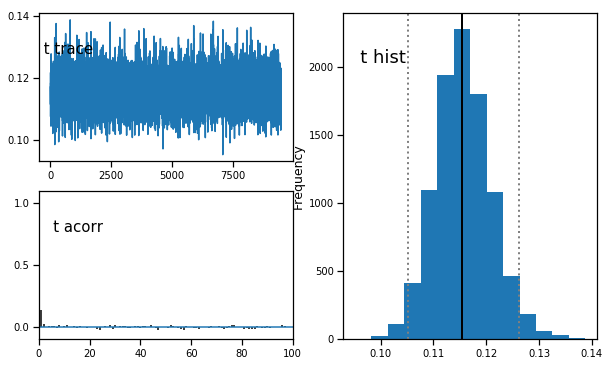

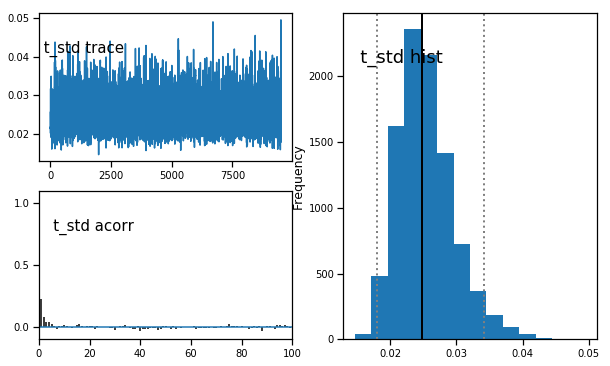

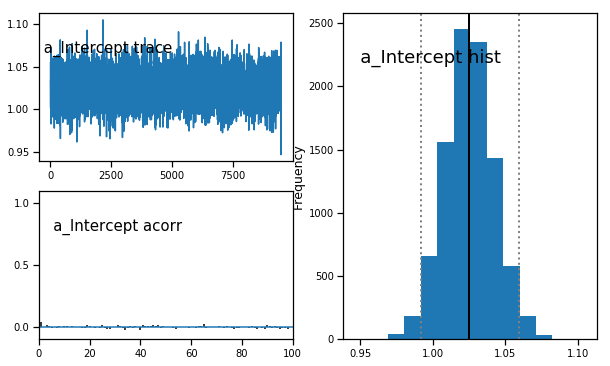

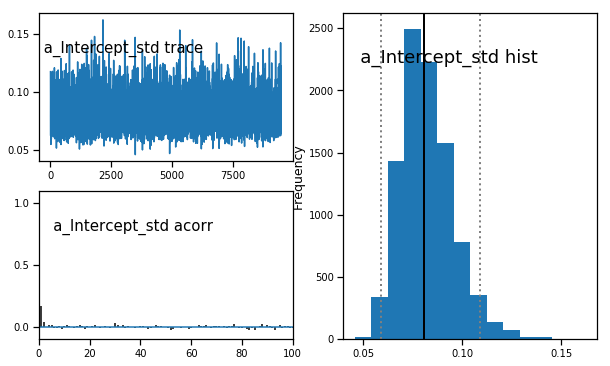

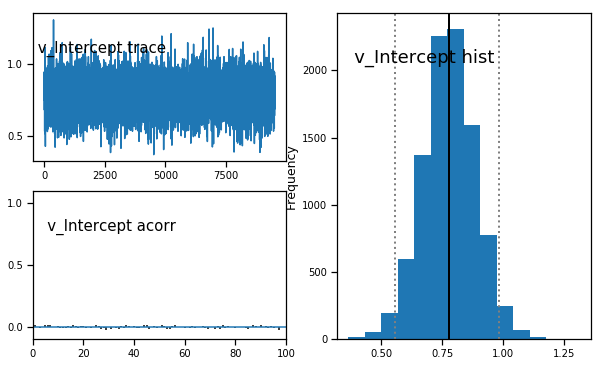

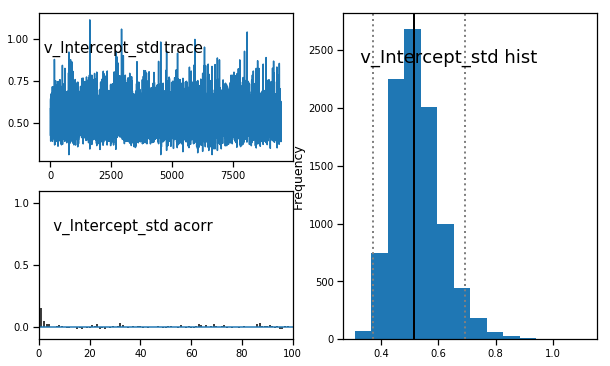

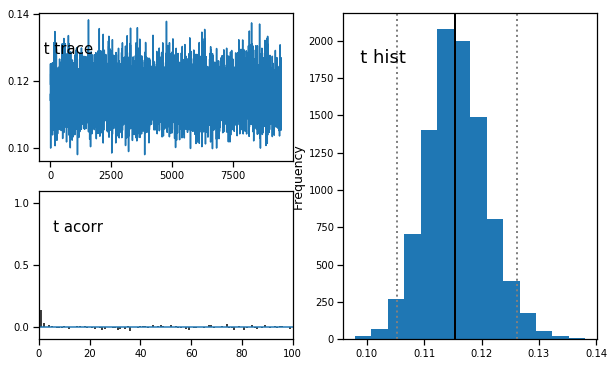

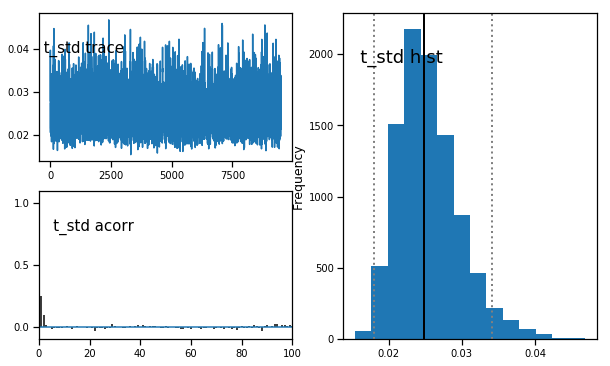

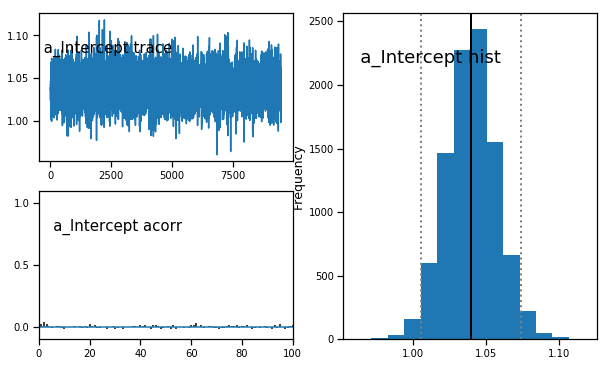

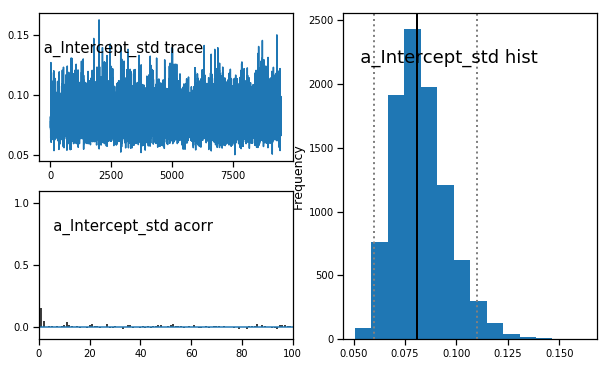

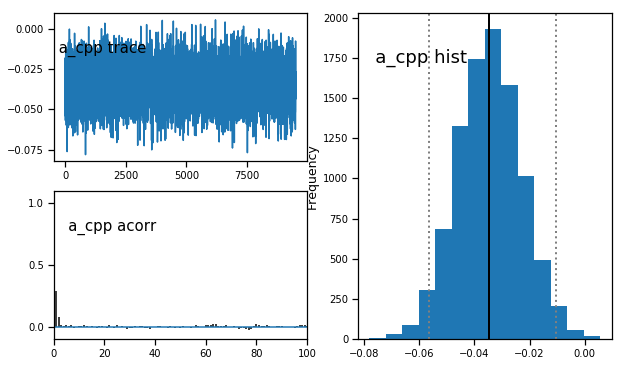

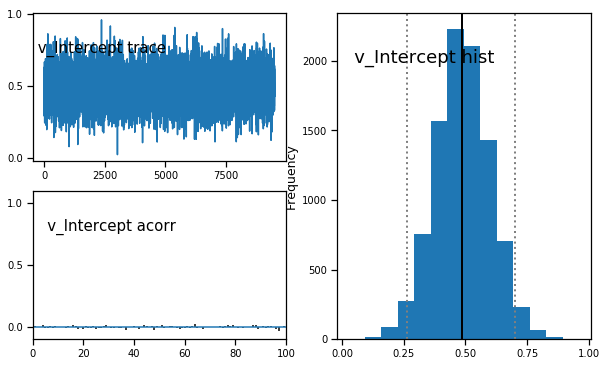

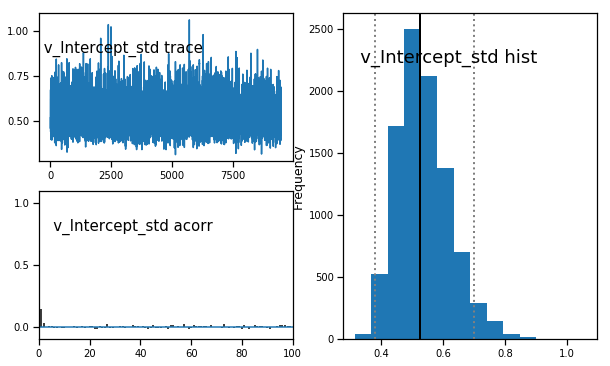

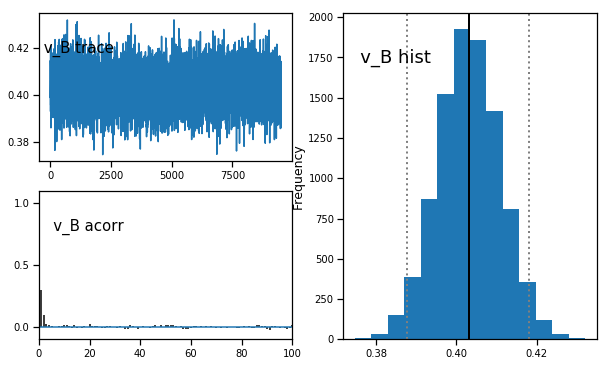

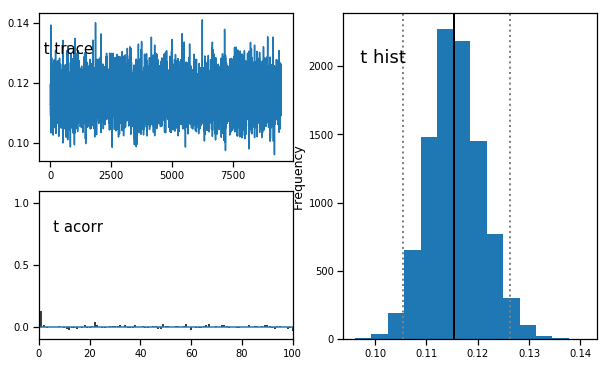

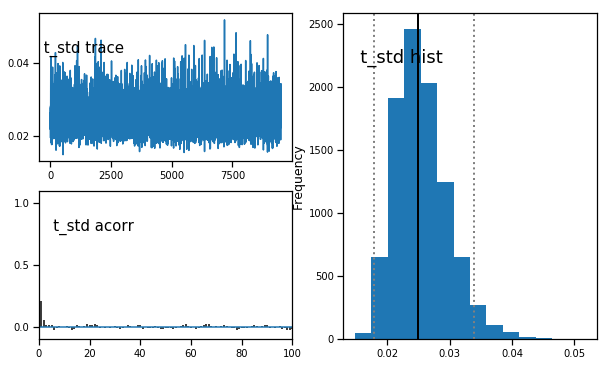

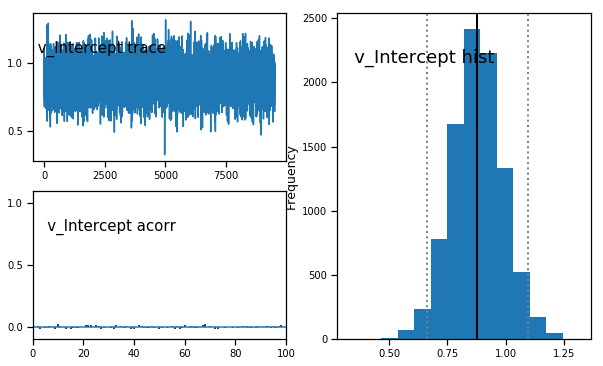

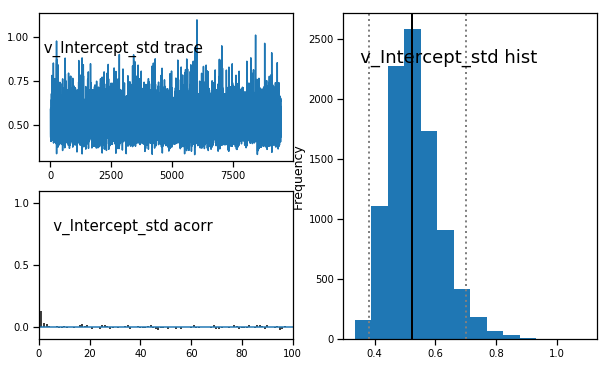

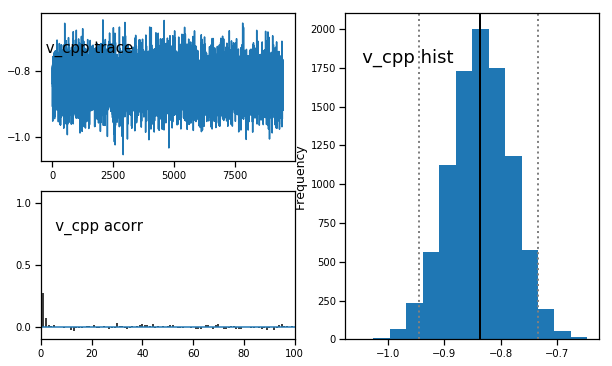

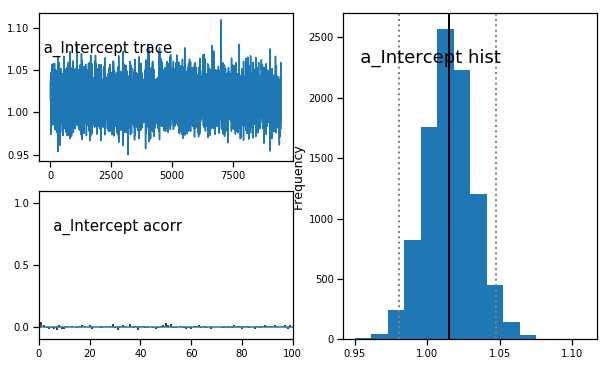

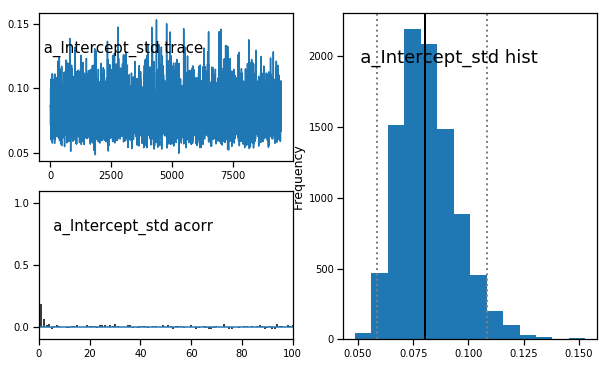

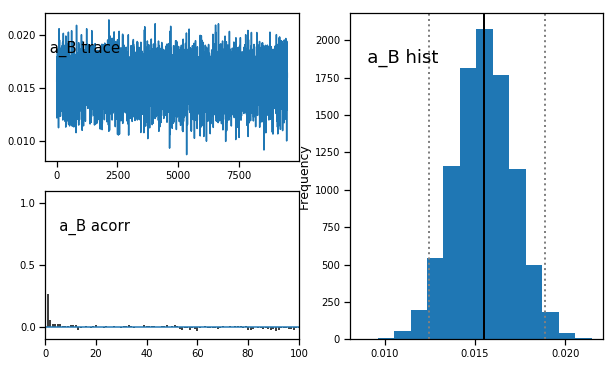

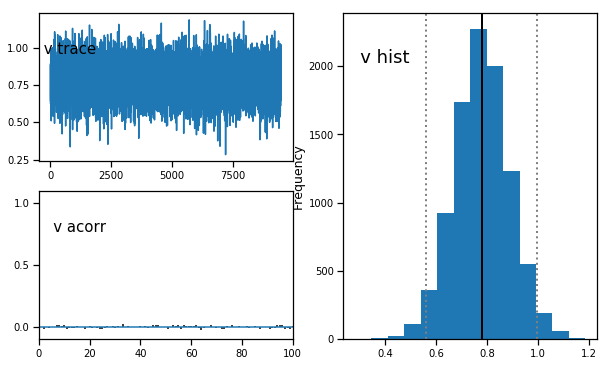

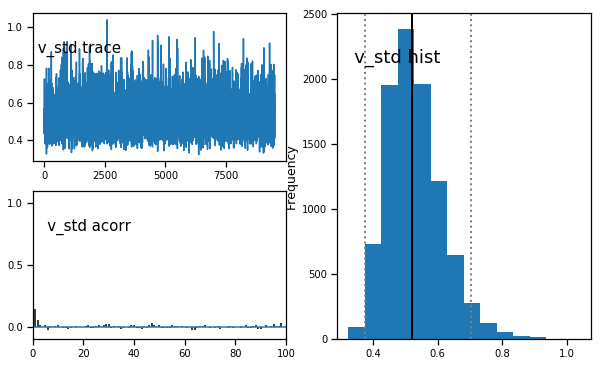

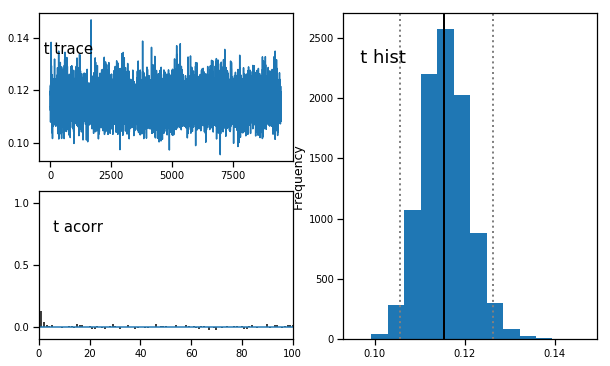

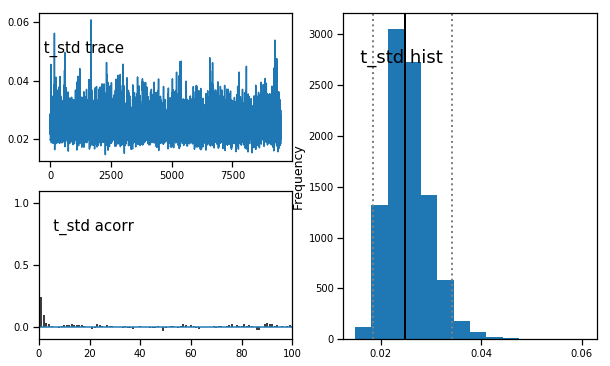

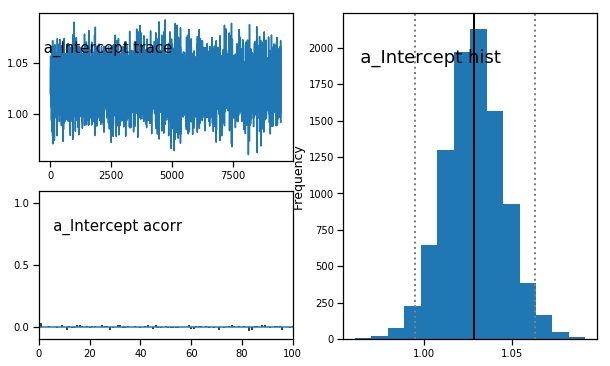

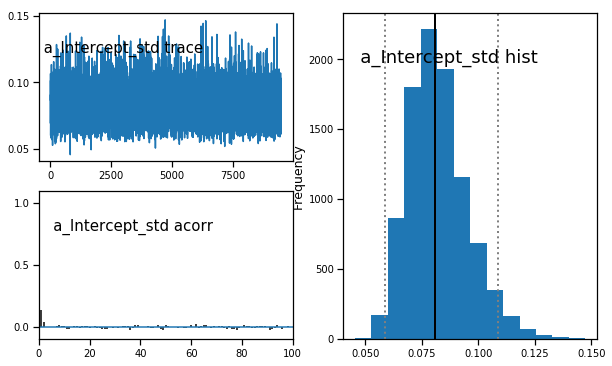

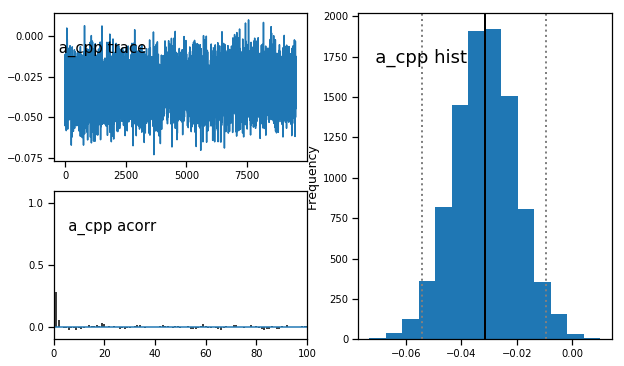

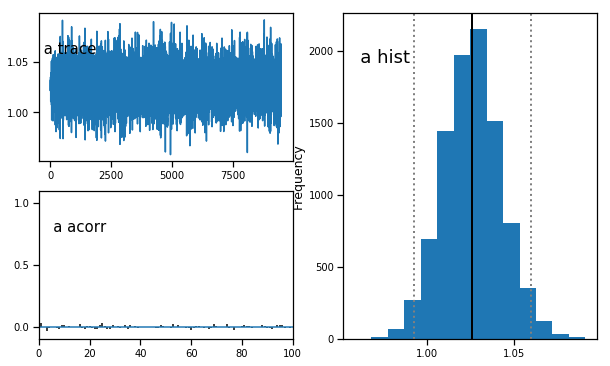

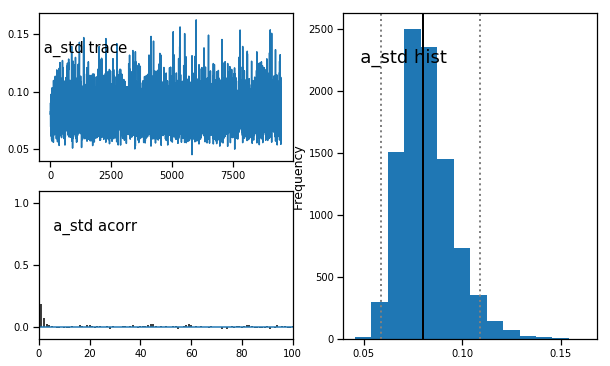

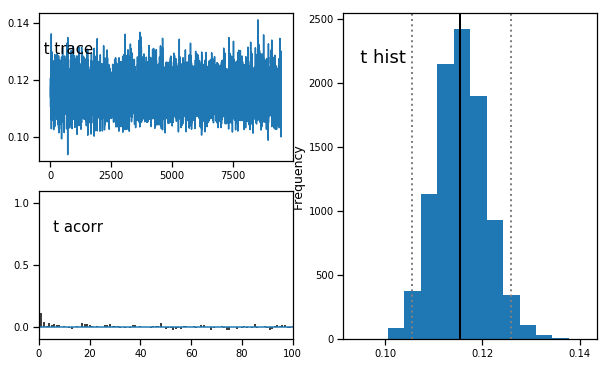

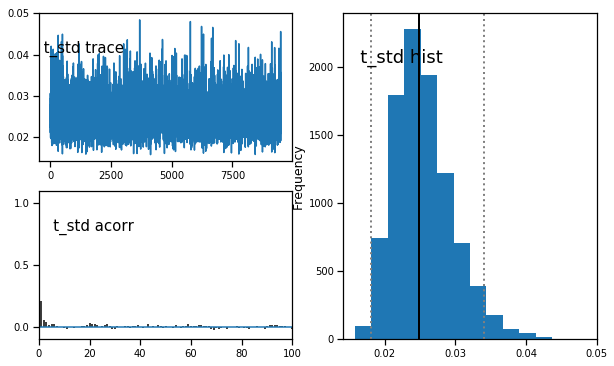

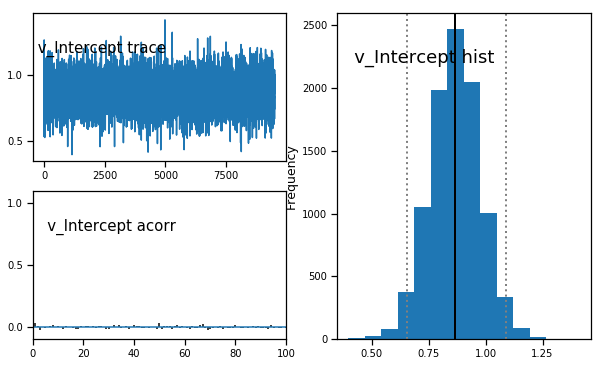

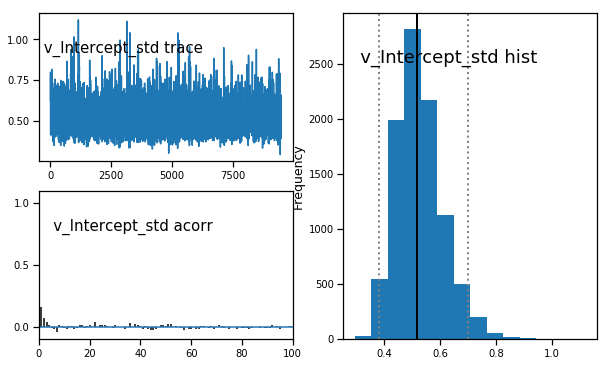

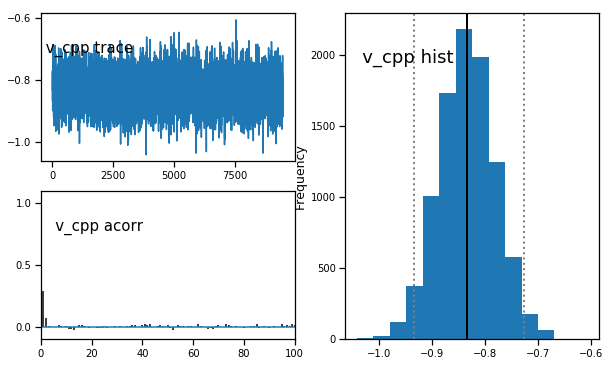

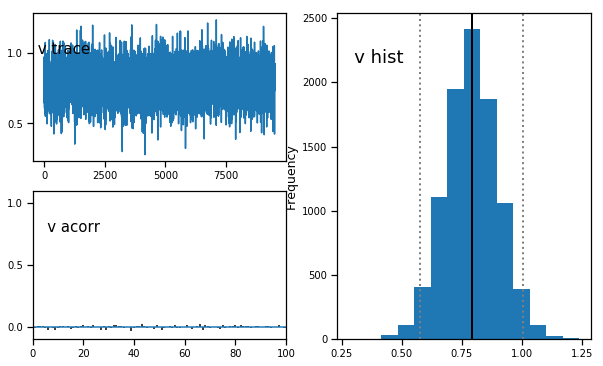

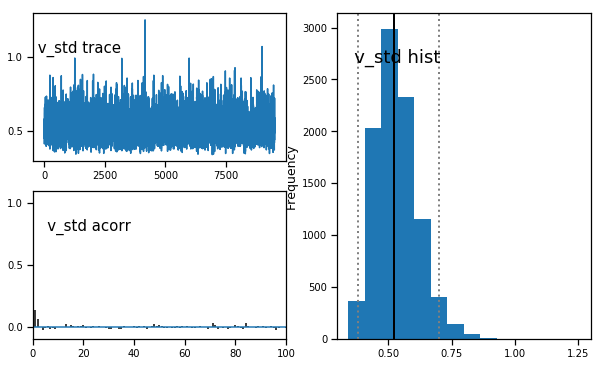

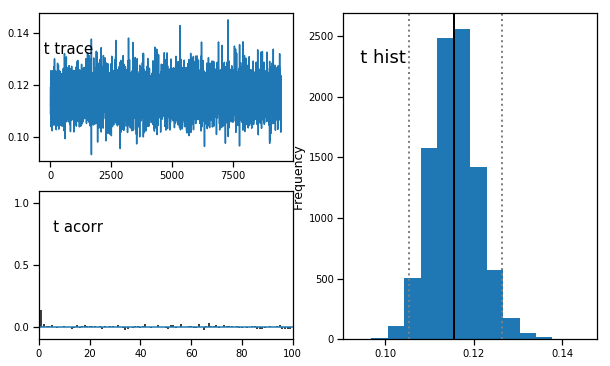

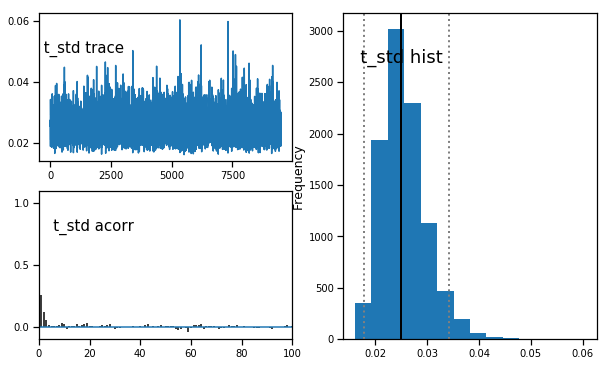

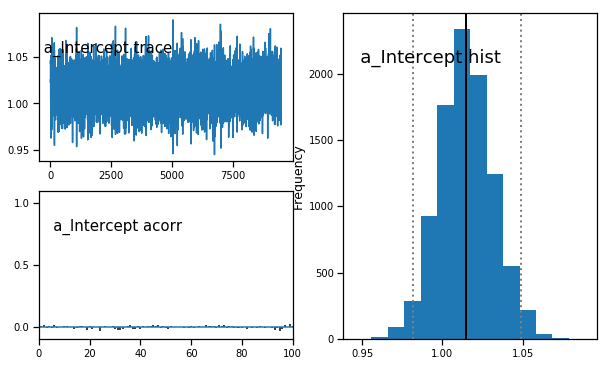

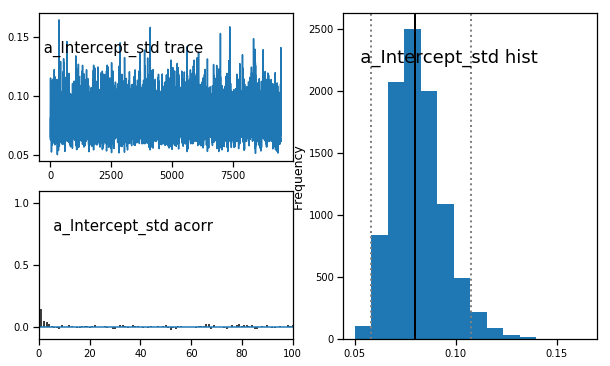

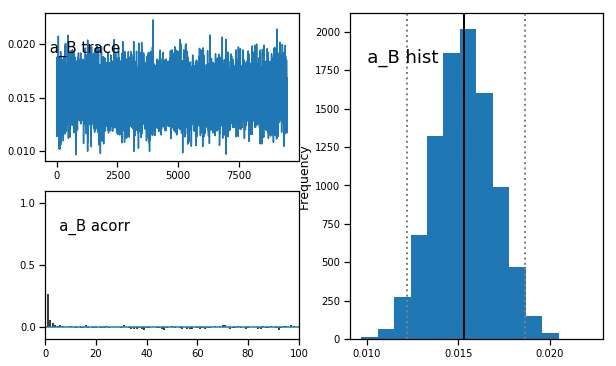

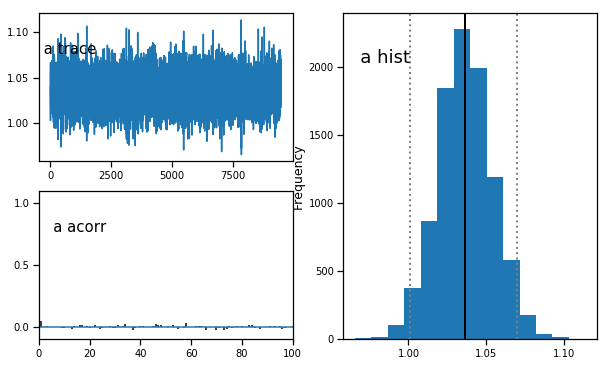

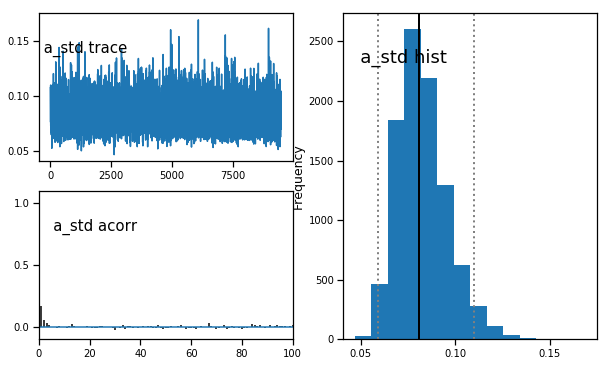

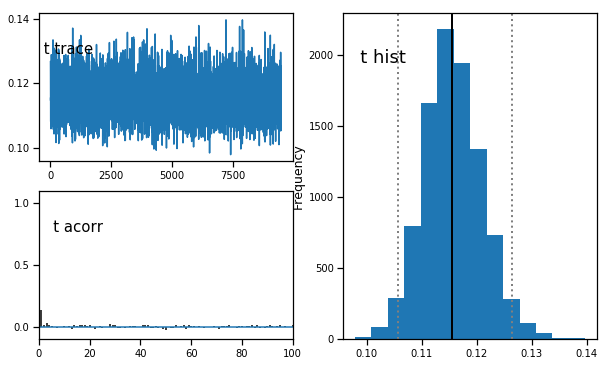

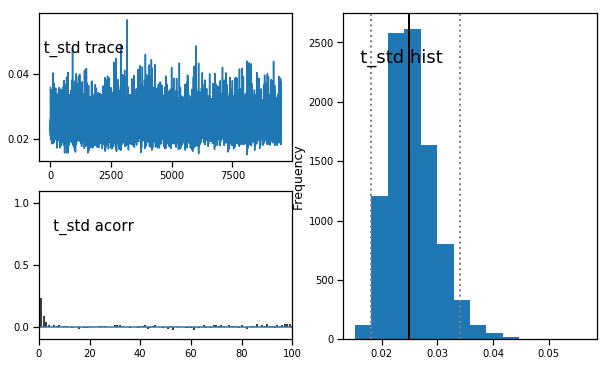

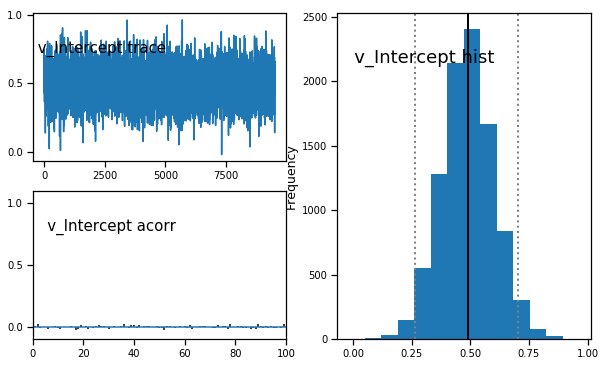

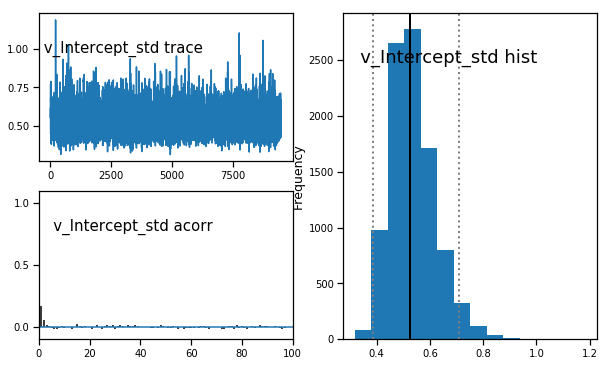

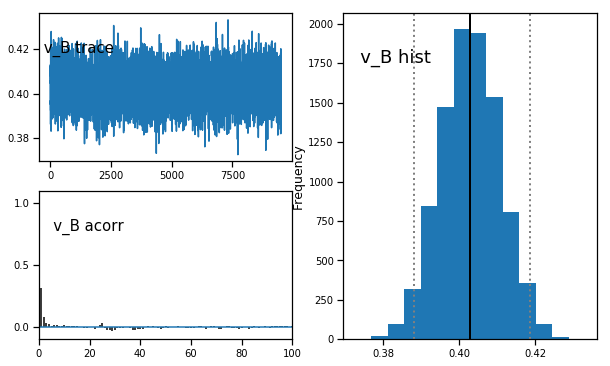

In [7]:
# assess convergence 
sns.set_context("notebook", font_scale=1.5)

[hddm_models[model_n].plot_posteriors() for model_n, _ in enumerate(model_names)]

In [59]:
model_traces_dir = os.path.join(home, 'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/model_traces')

In [69]:
[hddm_models[model_n].get_group_traces().to_csv(os.path.join(model_traces_dir, model_name + '_traces.csv'), index=False) for model_n, model_name in enumerate(model_names)]

[None, None, None, None, None, None, None]

In [61]:
model_dics = []

for model_n, model_name in enumerate(model_names):

    print(model_n , model_name)
    
    model_dics.append(hddm_models[model_n].dic)

(0, 'intercept_only_obs_reg_simple_acc')
(1, 'a_cpp_v_B_obs_reg_simple_acc')
(2, 'v_cpp_a_B_obs_reg_simple_acc')
(3, 'a_cpp_obs_reg_simple_acc')
(4, 'v_cpp_obs_reg_simple_acc')
(5, 'a_B_obs_reg_simple_acc')
(6, 'v_B_obs_reg_simple_acc')


In [62]:
dic_df = pd.melt(pd.DataFrame(dict(zip(model_names, model_dics)), index=[0]), var_name='model', 
                 value_name='dic')

In [63]:
dic_df['intercept_diff_dic'] = dic_df.dic.values - dic_df.loc[dic_df.model=='intercept_only_obs_reg_simple_acc'].dic.values

In [68]:
dic_df.to_csv(os.path.join(reg_dir, 'dic_df.csv'), index=False)